In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sb
from pandas.plotting import scatter_matrix

# Machine Learning Algorithms
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Model Selection and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


# Performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

#decision tree
import sklearn.tree as sktree

# For Missing Values
from sklearn.impute import SimpleImputer

import statsmodels.api as sm
import patsy


C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
import seaborn as sns #visualisation
import scipy
from scipy import stats
from scipy.stats.mstats import winsorize

# Get the data

In [3]:
players_22 = pd.read_csv('./FIFA/players_22.csv')

C:\Users\Kiko\AppData\Local\Temp/ipykernel_9988/2832845975.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players_22 = pd.read_csv('./FIFA/players_22.csv')


# Structure of the file

In [4]:
players_22.head(10)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1     188545  https://sofifa.com/player/188545/robert-lewand...   
2      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
3     190871  https://sofifa.com/player/190871/neymar-da-sil...   
4     192985  https://sofifa.com/player/192985/kevin-de-bruy...   
5     200389  https://sofifa.com/player/200389/jan-oblak/220002   
6     231747  https://sofifa.com/player/231747/kylian-mbappe...   
7     167495  https://sofifa.com/player/167495/manuel-neuer/...   
8     192448  https://sofifa.com/player/192448/marc-andre-te...   
9     202126  https://sofifa.com/player/202126/harry-kane/22...   

          short_name                            long_name player_positions  \
0           L. Messi       Lionel Andrés Messi Cuccittini       RW, ST, CF   
1     R. Lewandowski                   Robert Lewandowski               ST   
2  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro           ST, LW   
3          Neymar Jr        Neymar da Silva Santos Júnior          LW, CAM   
4       K. De Bruyne                      Kevin De Bruyne          CM, CAM   
5           J. Oblak                            Jan Oblak               GK   
6          K. Mbappé                 Kylian Mbappé Lottin           ST, LW   
7           M. Neuer                   Manuel Peter Neuer               GK   
8      M. ter Stegen                Marc-André ter Stegen               GK   
9            H. Kane                           Harry Kane               ST   

   overall  potential    value_eur  wage_eur  age  ...   lcb    cb   rcb  \
0       93         93   78000000.0  320000.0   34  ...  50+3  50+3  50+3   
1       92         92  119500000.0  270000.0   32  ...  60+3  60+3  60+3   
2       91         91   45000000.0  270000.0   36  ...  53+3  53+3  53+3   
3       91         91  129000000.0  270000.0   29  ...  50+3  50+3  50+3   
4       91         91  125500000.0  350000.0   30  ...  69+3  69+3  69+3   
5       91         93  112000000.0  130000.0   28  ...  33+3  33+3  33+3   
6       91         95  194000000.0  230000.0   22  ...  54+3  54+3  54+3   
7       90         90   13500000.0   86000.0   35  ...  34+3  34+3  34+3   
8       90         92   99000000.0  250000.0   29  ...  33+3  33+3  33+3   
9       90         90  129500000.0  240000.0   27  ...  61+3  61+3  61+3   

     rb    gk                                    player_face_url  \
0  61+3  19+3  https://cdn.sofifa.net/players/158/023/22_120.png   
1  61+3  19+3  https://cdn.sofifa.net/players/188/545/22_120.png   
2  60+3  20+3  https://cdn.sofifa.net/players/020/801/22_120.png   
3  62+3  20+3  https://cdn.sofifa.net/players/190/871/22_120.png   
4  75+3  21+3  https://cdn.sofifa.net/players/192/985/22_120.png   
5  32+3  89+3  https://cdn.sofifa.net/players/200/389/22_120.png   
6  63+3  18+3  https://cdn.sofifa.net/players/231/747/22_120.png   
7  35+3  88+2  https://cdn.sofifa.net/players/167/495/22_120.png   
8  31+3  88+3  https://cdn.sofifa.net/players/192/448/22_120.png   
9  64+3  20+3  https://cdn.sofifa.net/players/202/126/22_120.png   

                             club_logo_url  \
0   https://cdn.sofifa.net/teams/73/60.png   
1   https://cdn.sofifa.net/teams/21/60.png   
2   https://cdn.sofifa.net/teams/11/60.png   
3   https://cdn.sofifa.net/teams/73/60.png   
4   https://cdn.sofifa.net/teams/10/60.png   
5  https://cdn.sofifa.net/teams/240/60.png   
6   https://cdn.sofifa.net/teams/73/60.png   
7   https://cdn.sofifa.net/teams/21/60.png   
8  https://cdn.sofifa.net/teams/241/60.png   
9   https://cdn.sofifa.net/teams/18/60.png   

                             club_flag_url  \
0      https://cdn.sofifa.net/flags/fr.png   
1      https://cdn.sofifa.net/flags/de.png   
2  https://cdn.sofifa.net/flags/gb-eng.png   
3      https://cdn.sofifa.net/flags/fr.png   
4  https://cdn.sofifa.net/flags/gb-eng.png   
5      https://cdn.sofifa.net/flags/e

In [5]:
players_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [6]:
players_22.shape

(19239, 110)

# Data Cleaning

In [7]:
players_22.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [8]:
#Keep only the target column and the columns which are not calculated using our target , or they can be calculated using the target and Item since we only have one item now
players_22 = players_22.drop(columns = ['player_url','long_name','club_loaned_from','club_contract_valid_until','club_joined','nation_team_id','nation_position','club_position','work_rate','body_type','real_face','player_tags','player_traits','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url',
                                       'ls','st','rs','lw','lf','cf','rf','rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',
                                        'player_positions', 'dob', 'weak_foot', 'club_team_id', 'club_name', 'league_name',
                                        'league_level', 'club_jersey_number', 'nationality_id', 'nationality_name', 'nation_jersey_number',
                                        'skill_moves', 'release_clause_eur', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
                                        'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                                        'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
                                        'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'attacking_short_passing','defending_marking_awareness','defending_sliding_tackle','defending_standing_tackle'])
players_22

sofifa_id          short_name  overall  potential    value_eur  \
0         158023            L. Messi       93         93   78000000.0   
1         188545      R. Lewandowski       92         92  119500000.0   
2          20801   Cristiano Ronaldo       91         91   45000000.0   
3         190871           Neymar Jr       91         91  129000000.0   
4         192985        K. De Bruyne       91         91  125500000.0   
...          ...                 ...      ...        ...          ...   
19234     261962           Song Defu       47         52      70000.0   
19235     262040           C. Porter       47         59     110000.0   
19236     262760            N. Logue       47         55     100000.0   
19237     262820           L. Rudden       47         60     110000.0   
19238     264540  E. Lalchhanchhuaha       47         60     110000.0   

       wage_eur  age  height_cm  weight_kg preferred_foot  ...  \
0      320000.0   34        170         72           Left  ...   
1      270000.0   32        185         81          Right  ...   
2      270000.0   36        187         83          Right  ...   
3      270000.0   29        175         68          Right  ...   
4      350000.0   30        181         70          Right  ...   
...         ...  ...        ...        ...            ...  ...   
19234    1000.0   22        180         64          Right  ...   
19235     500.0   19        175         70          Right  ...   
19236     500.0   21        178         72          Right  ...   
19237     500.0   19        173         66          Right  ...   
19238     500.0   19        167         61          Right  ...   

       mentality_positioning  mentality_vision  mentality_penalties  \
0                         93                95                   75   
1                         95                81                   90   
2                         95                76                   88   
3                         86                90                   93   
4                         88                94                   83   
...                      ...               ...                  ...   
19234                     38                43                   42   
19235                     51                49                   44   
19236                     45                46                   39   
19237                     47                40                   49   
19238                     47                46                   35   

       mentality_composure  goalkeeping_diving  goalkeeping_handling  \
0                       96                   6                    11   
1                       88                  15                     6   
2                       95                   7                    11   
3                       93                   9                     9   
4                       89                  15                    13   
...                    ...                 ...                   ...   
19234                   37                   6                    10   
19235                   47                  11                    12   
19236                   36                   8                     6   
19237                   47                   7                    10   
19238                   36                   8                    13   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                       15                       14                     8   
1                       12                        8                    10   
2                       15                       14                    11   
3                       15                       15                    11   
4                        5                       10                    13   
...                    ...                      ...                   ...   
19234                    5                       15                    13   
192

In [9]:
players_22.describe()

sofifa_id       overall     potential     value_eur       wage_eur  \
count   19239.000000  19239.000000  19239.000000  1.916500e+04   19178.000000   
mean   231468.086959     65.772182     71.079370  2.850452e+06    9017.989363   
std     27039.717497      6.880232      6.086213  7.613700e+06   19470.176724   
min        41.000000     47.000000     49.000000  9.000000e+03     500.000000   
25%    214413.500000     61.000000     67.000000  4.750000e+05    1000.000000   
50%    236543.000000     66.000000     71.000000  9.750000e+05    3000.000000   
75%    253532.500000     70.000000     75.000000  2.000000e+06    8000.000000   
max    264640.000000     93.000000     95.000000  1.940000e+08  350000.000000   

                age     height_cm     weight_kg  international_reputation  \
count  19239.000000  19239.000000  19239.000000              19239.000000   
mean      25.210822    181.299704     74.943032                  1.094184   
std        4.748235      6.863179      7.069434                  0.371098   
min       16.000000    155.000000     49.000000                  1.000000   
25%       21.000000    176.000000     70.000000                  1.000000   
50%       25.000000    181.000000     75.000000                  1.000000   
75%       29.000000    186.000000     80.000000                  1.000000   
max       54.000000    206.000000    110.000000                  5.000000   

               pace  ...  mentality_positioning  mentality_vision  \
count  17107.000000  ...           19239.000000      19239.000000   
mean      68.213071  ...              50.330215         53.964603   
std       10.933155  ...              19.621601         13.650481   
min       28.000000  ...               2.000000         10.000000   
25%       62.000000  ...              40.000000         45.000000   
50%       69.000000  ...              56.000000         55.000000   
75%       76.000000  ...              64.000000         64.000000   
max       97.000000  ...              96.000000         95.000000   

       mentality_penalties  mentality_composure  goalkeeping_diving  \
count         19239.000000         19239.000000        19239.000000   
mean             47.858724            57.929830           16.406102   
std              15.768583            12.159326           17.574028   
min               7.000000            12.000000            2.000000   
25%              38.000000            50.000000            8.000000   
50%              49.000000            59.000000           11.000000   
75%              60.000000            66.000000           14.000000   
max              93.000000            96.000000           91.000000   

       goalkeeping_handling  goalkeeping_kicking  goalkeeping_positioning  \
count          19239.000000         19239.000000             19239.000000   
mean              16.192474            16.055356                16.229274   
std               16.839528            16.564554                17.059779   
min                2.000000             2.000000                 2.000000   
25%                8.000000             8.000000                 8.000000   
50%               11.000000            11.000000                11.000000   
75%               14.000000            14.000000                14.000000   
max               92.000000            93.000000                92.000000   

       goalkeeping_reflexes  goalkeeping_speed  
count          19239.000000        2132.000000  
mean              16.491814          36.439962  
std               17.884833          10.751563  
min                2.000000          15.000000  
25%                8.000000          27.000000  
50%               11.000000          36.000000  
75%               14.000000          45.000000  
max               90.000000          65.000000  

[8 rows x 28 columns]

In [10]:
players_22.dtypes

sofifa_id                     int64
short_name                   object
overall                       int64
potential                     int64
value_eur                   float64
wage_eur                    float64
age                           int64
height_cm                     int64
weight_kg                     int64
preferred_foot               object
international_reputation      int64
pace                        float64
shooting                    float64
passing                     float64
dribbling                   float64
defending                   float64
physic                      float64
skill_ball_control            int64
mentality_aggression          int64
mentality_interceptions       int64
mentality_positioning         int64
mentality_vision              int64
mentality_penalties           int64
mentality_composure           int64
goalkeeping_diving            int64
goalkeeping_handling          int64
goalkeeping_kicking           int64
goalkeeping_positioning     

In [11]:
#players_22['value_eur'].mean()
#players_22['wage_eur'].mean()
#players_22['pace'].mean()
#players_22['shooting'].mean()
#players_22['dribbling'].mean()
#players_22['defending'].mean()
#players_22['physic'].mean()
players_22['goalkeeping_speed'].mean()

36.43996247654784

In [12]:
#Due to an error with my python version, I fillna with the mean calculated manually in the step before
players_22['value_eur'] = players_22['value_eur'].fillna("2850451").astype('float64')
players_22['wage_eur'] = players_22['wage_eur'].fillna("9000").astype('float64')
players_22['pace'] = players_22['pace'].fillna(68)
players_22['shooting'] = players_22['shooting'].fillna(52)
players_22['passing'] = players_22['passing'].fillna(50)
players_22['dribbling'] = players_22['dribbling'].fillna(62)
players_22['defending'] = players_22['defending'].fillna(51)
players_22['physic'] = players_22['physic'].fillna(65)
players_22['goalkeeping_speed'] = players_22['goalkeeping_speed'].fillna(36)      
players_22

sofifa_id          short_name  overall  potential    value_eur  \
0         158023            L. Messi       93         93   78000000.0   
1         188545      R. Lewandowski       92         92  119500000.0   
2          20801   Cristiano Ronaldo       91         91   45000000.0   
3         190871           Neymar Jr       91         91  129000000.0   
4         192985        K. De Bruyne       91         91  125500000.0   
...          ...                 ...      ...        ...          ...   
19234     261962           Song Defu       47         52      70000.0   
19235     262040           C. Porter       47         59     110000.0   
19236     262760            N. Logue       47         55     100000.0   
19237     262820           L. Rudden       47         60     110000.0   
19238     264540  E. Lalchhanchhuaha       47         60     110000.0   

       wage_eur  age  height_cm  weight_kg preferred_foot  ...  \
0      320000.0   34        170         72           Left  ...   
1      270000.0   32        185         81          Right  ...   
2      270000.0   36        187         83          Right  ...   
3      270000.0   29        175         68          Right  ...   
4      350000.0   30        181         70          Right  ...   
...         ...  ...        ...        ...            ...  ...   
19234    1000.0   22        180         64          Right  ...   
19235     500.0   19        175         70          Right  ...   
19236     500.0   21        178         72          Right  ...   
19237     500.0   19        173         66          Right  ...   
19238     500.0   19        167         61          Right  ...   

       mentality_positioning  mentality_vision  mentality_penalties  \
0                         93                95                   75   
1                         95                81                   90   
2                         95                76                   88   
3                         86                90                   93   
4                         88                94                   83   
...                      ...               ...                  ...   
19234                     38                43                   42   
19235                     51                49                   44   
19236                     45                46                   39   
19237                     47                40                   49   
19238                     47                46                   35   

       mentality_composure  goalkeeping_diving  goalkeeping_handling  \
0                       96                   6                    11   
1                       88                  15                     6   
2                       95                   7                    11   
3                       93                   9                     9   
4                       89                  15                    13   
...                    ...                 ...                   ...   
19234                   37                   6                    10   
19235                   47                  11                    12   
19236                   36                   8                     6   
19237                   47                   7                    10   
19238                   36                   8                    13   

       goalkeeping_kicking  goalkeeping_positioning  goalkeeping_reflexes  \
0                       15                       14                     8   
1                       12                        8                    10   
2                       15                       14                    11   
3                       15                       15                    11   
4                        5                       10                    13   
...                    ...                      ...                   ...   
19234                    5                       15                    13   
192

In [13]:
players_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sofifa_id                 19239 non-null  int64  
 1   short_name                19239 non-null  object 
 2   overall                   19239 non-null  int64  
 3   potential                 19239 non-null  int64  
 4   value_eur                 19239 non-null  float64
 5   wage_eur                  19239 non-null  float64
 6   age                       19239 non-null  int64  
 7   height_cm                 19239 non-null  int64  
 8   weight_kg                 19239 non-null  int64  
 9   preferred_foot            19239 non-null  object 
 10  international_reputation  19239 non-null  int64  
 11  pace                      19239 non-null  float64
 12  shooting                  19239 non-null  float64
 13  passing                   19239 non-null  float64
 14  dribbl

In [14]:
players_22['ball_skills'] = (players_22['skill_ball_control']+players_22['dribbling'])/2
players_22 = players_22.drop(columns = ['skill_ball_control','dribbling'])

In [15]:
#We have an atribute defined yet for the defence, not necessary to calcul a new one
#players_22['defence'] = (players_22['defending_marking_awareness']+players_22['defending_sliding_tackle']+players_22['defending_standing_tackle'])/3
#players_22 = players_22.drop(columns = ['defending_marking_awareness','defending_sliding_tackle','defending_standing_tackle'])

In [16]:
players_22['mental'] = (players_22['mentality_aggression']+players_22['mentality_interceptions']+
                     players_22['mentality_positioning']+players_22['mentality_vision']+
                     players_22['mentality_penalties']+players_22['mentality_composure'])/6

players_22 = players_22.drop(columns = ['mentality_aggression','mentality_interceptions','mentality_positioning','mentality_vision','mentality_penalties','mentality_composure'])

In [17]:
players_22['goalkeeping'] = (players_22['goalkeeping_speed']+players_22['goalkeeping_positioning']
                             +players_22['goalkeeping_diving']+players_22['goalkeeping_handling']
                             +players_22['goalkeeping_kicking']+players_22['goalkeeping_reflexes'])/6

players_22 = players_22.drop(columns = ['goalkeeping_speed','goalkeeping_positioning','goalkeeping_diving',
                                        'goalkeeping_handling','goalkeeping_kicking','goalkeeping_reflexes'])

In [18]:
players_22 = pd.get_dummies(players_22,columns=['preferred_foot'],drop_first=True)

In [19]:
players_22.drop(['overall','potential','wage_eur'],axis=1,inplace=True)

In [20]:
players_22.set_index('sofifa_id', inplace = True)

In [21]:
players_22.head(10)

short_name    value_eur  age  height_cm  weight_kg  \
sofifa_id                                                              
158023              L. Messi   78000000.0   34        170         72   
188545        R. Lewandowski  119500000.0   32        185         81   
20801      Cristiano Ronaldo   45000000.0   36        187         83   
190871             Neymar Jr  129000000.0   29        175         68   
192985          K. De Bruyne  125500000.0   30        181         70   
200389              J. Oblak  112000000.0   28        188         87   
231747             K. Mbappé  194000000.0   22        182         73   
167495              M. Neuer   13500000.0   35        193         93   
192448         M. ter Stegen   99000000.0   29        187         85   
202126               H. Kane  129500000.0   27        188         89   

           international_reputation  pace  shooting  passing  defending  \
sofifa_id                                                                 
158023                            5  85.0      92.0     91.0       34.0   
188545                            5  78.0      92.0     79.0       44.0   
20801                             5  87.0      94.0     80.0       34.0   
190871                            5  91.0      83.0     86.0       37.0   
192985                            4  76.0      86.0     93.0       64.0   
200389                            5  68.0      52.0     50.0       51.0   
231747                            4  97.0      88.0     80.0       36.0   
167495                            5  68.0      52.0     50.0       51.0   
192448                            4  68.0      52.0     50.0       51.0   
202126                            4  70.0      91.0     83.0       47.0   

           physic  ball_skills     mental  goalkeeping  preferred_foot_Right  
sofifa_id                                                                     
158023       65.0         95.5  73.833333    15.000000                     0  
188545       82.0         87.0  80.666667    14.500000                     1  
20801        75.0         88.0  74.333333    15.666667                     1  
190871       63.0         94.5  77.000000    15.833333                     1  
192985       78.0         89.5  82.666667    15.333333                     1  
200389       65.0         46.0  34.666667    81.166667                     1  
231747       77.0         91.5  73.500000    13.000000                     1  
167495       65.0         54.0  43.000000    83.333333                     1  
192448       65.0         46.0  40.166667    80.333333                     1  
202126       83.0         84.0  81.166667    15.000000                     1

In [22]:
players_show = players_22.copy()
players_show['value_eur'] = players_show['value_eur'].apply(lambda x : "{:,}".format(int(x)))

In [23]:
players_show[['pace','ball_skills','defending','mental','passing','physic','shooting','goalkeeping']] = players_show[['pace','ball_skills','defending','mental','passing','physic','shooting','goalkeeping']].apply(lambda x: round(x,1))
players_show = players_show.rename(columns={'value_eur':'Market Value (Euros)'})
players_show

short_name Market Value (Euros)  age  height_cm  weight_kg  \
sofifa_id                                                                       
158023               L. Messi           78,000,000   34        170         72   
188545         R. Lewandowski          119,500,000   32        185         81   
20801       Cristiano Ronaldo           45,000,000   36        187         83   
190871              Neymar Jr          129,000,000   29        175         68   
192985           K. De Bruyne          125,500,000   30        181         70   
...                       ...                  ...  ...        ...        ...   
261962              Song Defu               70,000   22        180         64   
262040              C. Porter              110,000   19        175         70   
262760               N. Logue              100,000   21        178         72   
262820              L. Rudden              110,000   19        173         66   
264540     E. Lalchhanchhuaha              110,000   19        167         61   

           international_reputation  pace  shooting  passing  defending  \
sofifa_id                                                                 
158023                            5  85.0      92.0     91.0       34.0   
188545                            5  78.0      92.0     79.0       44.0   
20801                             5  87.0      94.0     80.0       34.0   
190871                            5  91.0      83.0     86.0       37.0   
192985                            4  76.0      86.0     93.0       64.0   
...                             ...   ...       ...      ...        ...   
261962                            1  58.0      35.0     46.0       42.0   
262040                            1  59.0      39.0     50.0       41.0   
262760                            1  60.0      37.0     45.0       41.0   
262820                            1  68.0      46.0     36.0       15.0   
264540                            1  68.0      38.0     45.0       36.0   

           physic  ball_skills  mental  goalkeeping  preferred_foot_Right  
sofifa_id                                                                  
158023       65.0         95.5    73.8         15.0                     0  
188545       82.0         87.0    80.7         14.5                     1  
20801        75.0         88.0    74.3         15.7                     1  
190871       63.0         94.5    77.0         15.8                     1  
192985       78.0         89.5    82.7         15.3                     1  
...           ...          ...     ...          ...                   ...  
261962       49.0         48.5    42.3         14.2                     1  
262040       51.0         44.0    46.5         13.8                     1  
262760       52.0         49.0    42.5         12.2                     1  
262820       42.0         46.5    38.5         14.8                     1  
264540       48.0         43.0    43.5         15.5                     1  

[19239 rows x 15 columns]

In [24]:
corr_matrix = players_22.corr()
corr_matrix

value_eur       age  height_cm  weight_kg  \
value_eur                  1.000000  0.042617   0.010270   0.035106   
age                        0.042617  1.000000   0.083009   0.239444   
height_cm                  0.010270  0.083009   1.000000   0.765465   
weight_kg                  0.035106  0.239444   0.765465   1.000000   
international_reputation   0.629788  0.231927   0.042307   0.088295   
pace                       0.173409 -0.192944  -0.361755  -0.324329   
shooting                   0.277243  0.228471  -0.174179  -0.080549   
passing                    0.385284  0.292682  -0.314486  -0.213661   
defending                  0.141124  0.226446   0.173982   0.171550   
physic                     0.204923  0.407810   0.452881   0.526422   
ball_skills                0.352389  0.141453  -0.425455  -0.329761   
mental                     0.301380  0.258743  -0.308997  -0.213956   
goalkeeping               -0.019136  0.120538   0.371366   0.346504   
preferred_foot_Right      -0.019993  0.003021   0.067120   0.071587   

                          international_reputation      pace  shooting  \
value_eur                                 0.629788  0.173409  0.277243   
age                                       0.231927 -0.192944  0.228471   
height_cm                                 0.042307 -0.361755 -0.174179   
weight_kg                                 0.088295 -0.324329 -0.080549   
international_reputation                  1.000000  0.026856  0.249736   
pace                                      0.026856  1.000000  0.327752   
shooting                                  0.249736  0.327752  1.000000   
passing                                   0.335847  0.248986  0.645563   
defending                                 0.134810 -0.300485 -0.404622   
physic                                    0.169110 -0.197099  0.015672   
ball_skills                               0.276782  0.328629  0.604610   
mental                                    0.266007  0.059328  0.381444   
goalkeeping                               0.014847 -0.009498 -0.002366   
preferred_foot_Right                     -0.001992 -0.062363  0.031247   

                           passing  defending    physic  ball_skills  \
value_eur                 0.385284   0.141124  0.204923     0.352389   
age                       0.292682   0.226446  0.407810     0.141453   
height_cm                -0.314486   0.173982  0.452881    -0.425455   
weight_kg                -0.213661   0.171550  0.526422    -0.329761   
international_reputation  0.335847   0.134810  0.169110     0.276782   
pace                      0.248986  -0.300485 -0.197099     0.328629   
shooting                  0.645563  -0.404622  0.015672     0.604610   
passing                   1.000000   0.175303  0.160866     0.800350   
defending                 0.175303   1.000000  0.538291    -0.039707   
physic                    0.160866   0.538291  1.000000     0.067657   
ball_skills               0.800350  -0.039707  0.067657     1.000000   
mental                    0.689829   0.251385  0.307577     0.844570   
goalkeeping              -0.224426  -0.009934  0.014806    -0.596770   
preferred_foot_Right     -0.095607  -0.062468  0.033806    -0.097919   

                            mental  goalkeeping  preferred_foot_Right  
value_eur                 0.301380    -0.019136             -0.019993  
age                       0.258743     0.120538              0.003021  
height_cm                -0.308997     0.371366              0.067120  
weight_kg                -0.213956     0.346504              0.071587  
international_reputation  0.266007     0.014847             -0.001992  
pace                      0.059328    -0.009498             -0.062363  
shooting                  0.381444    -0.002366              0.031247  
passing                   0.689829    -0.224426             -0.095607  
defending                 0.251385    -0.009934             -0.062468  
physic                    0.307577     0.014806 

Text(0.5, 1.0, 'Correlation Heatmap')

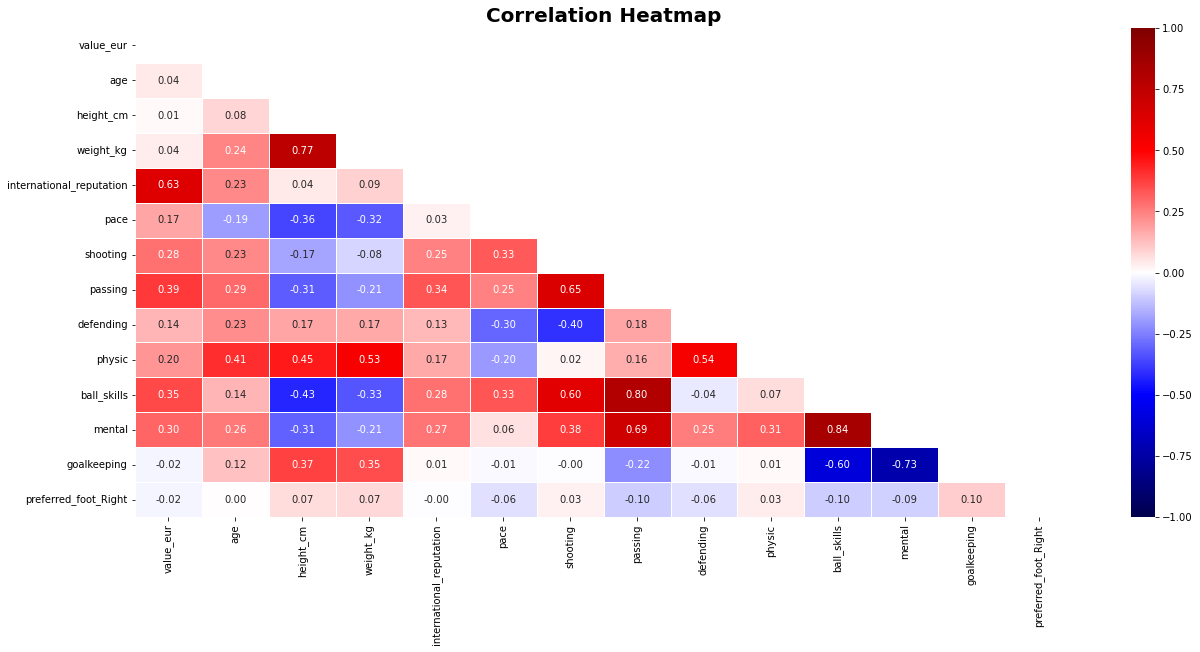

In [25]:
fig = plt.figure(figsize=[21,9])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

In [26]:
players_22 = players_22.drop(['height_cm','weight_kg','preferred_foot_Right'],axis=1)

Text(0.5, 1.0, 'Correlation Heatmap')

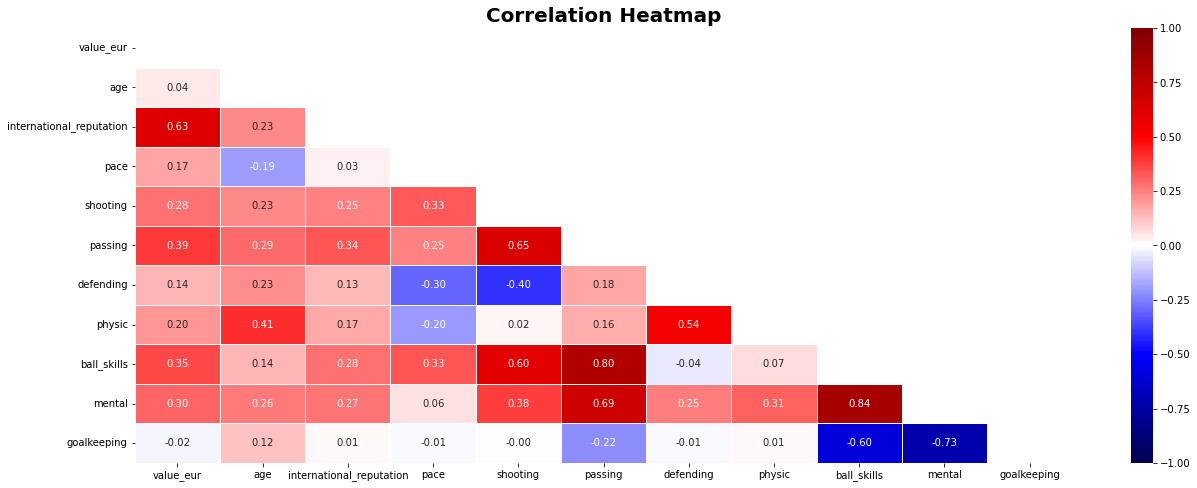

In [27]:
corr_matrix = players_22.corr()
fig = plt.figure(figsize=[21,8])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap2.png',transparent=True, bbox_inches='tight')

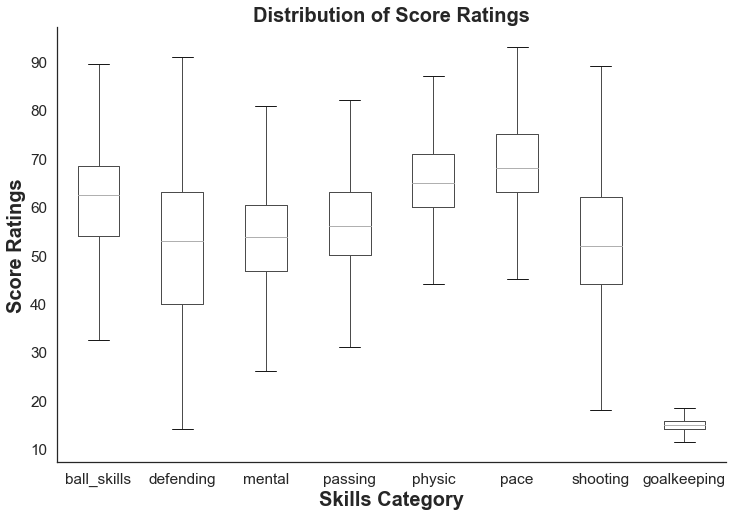

In [28]:
fig = plt.figure(figsize=[12,8])
sns.set(style = 'white', font_scale=1.4)
players_22[['ball_skills','defending','mental','passing','physic','pace','shooting','goalkeeping']].boxplot(showfliers=False)
plt.grid(False)
plt.xlabel('Skills Category',fontsize=20,weight='bold')
plt.ylabel('Score Ratings',fontsize=20,weight='bold')
plt.title('Distribution of Score Ratings',fontsize=20,weight='bold')
sns.despine()

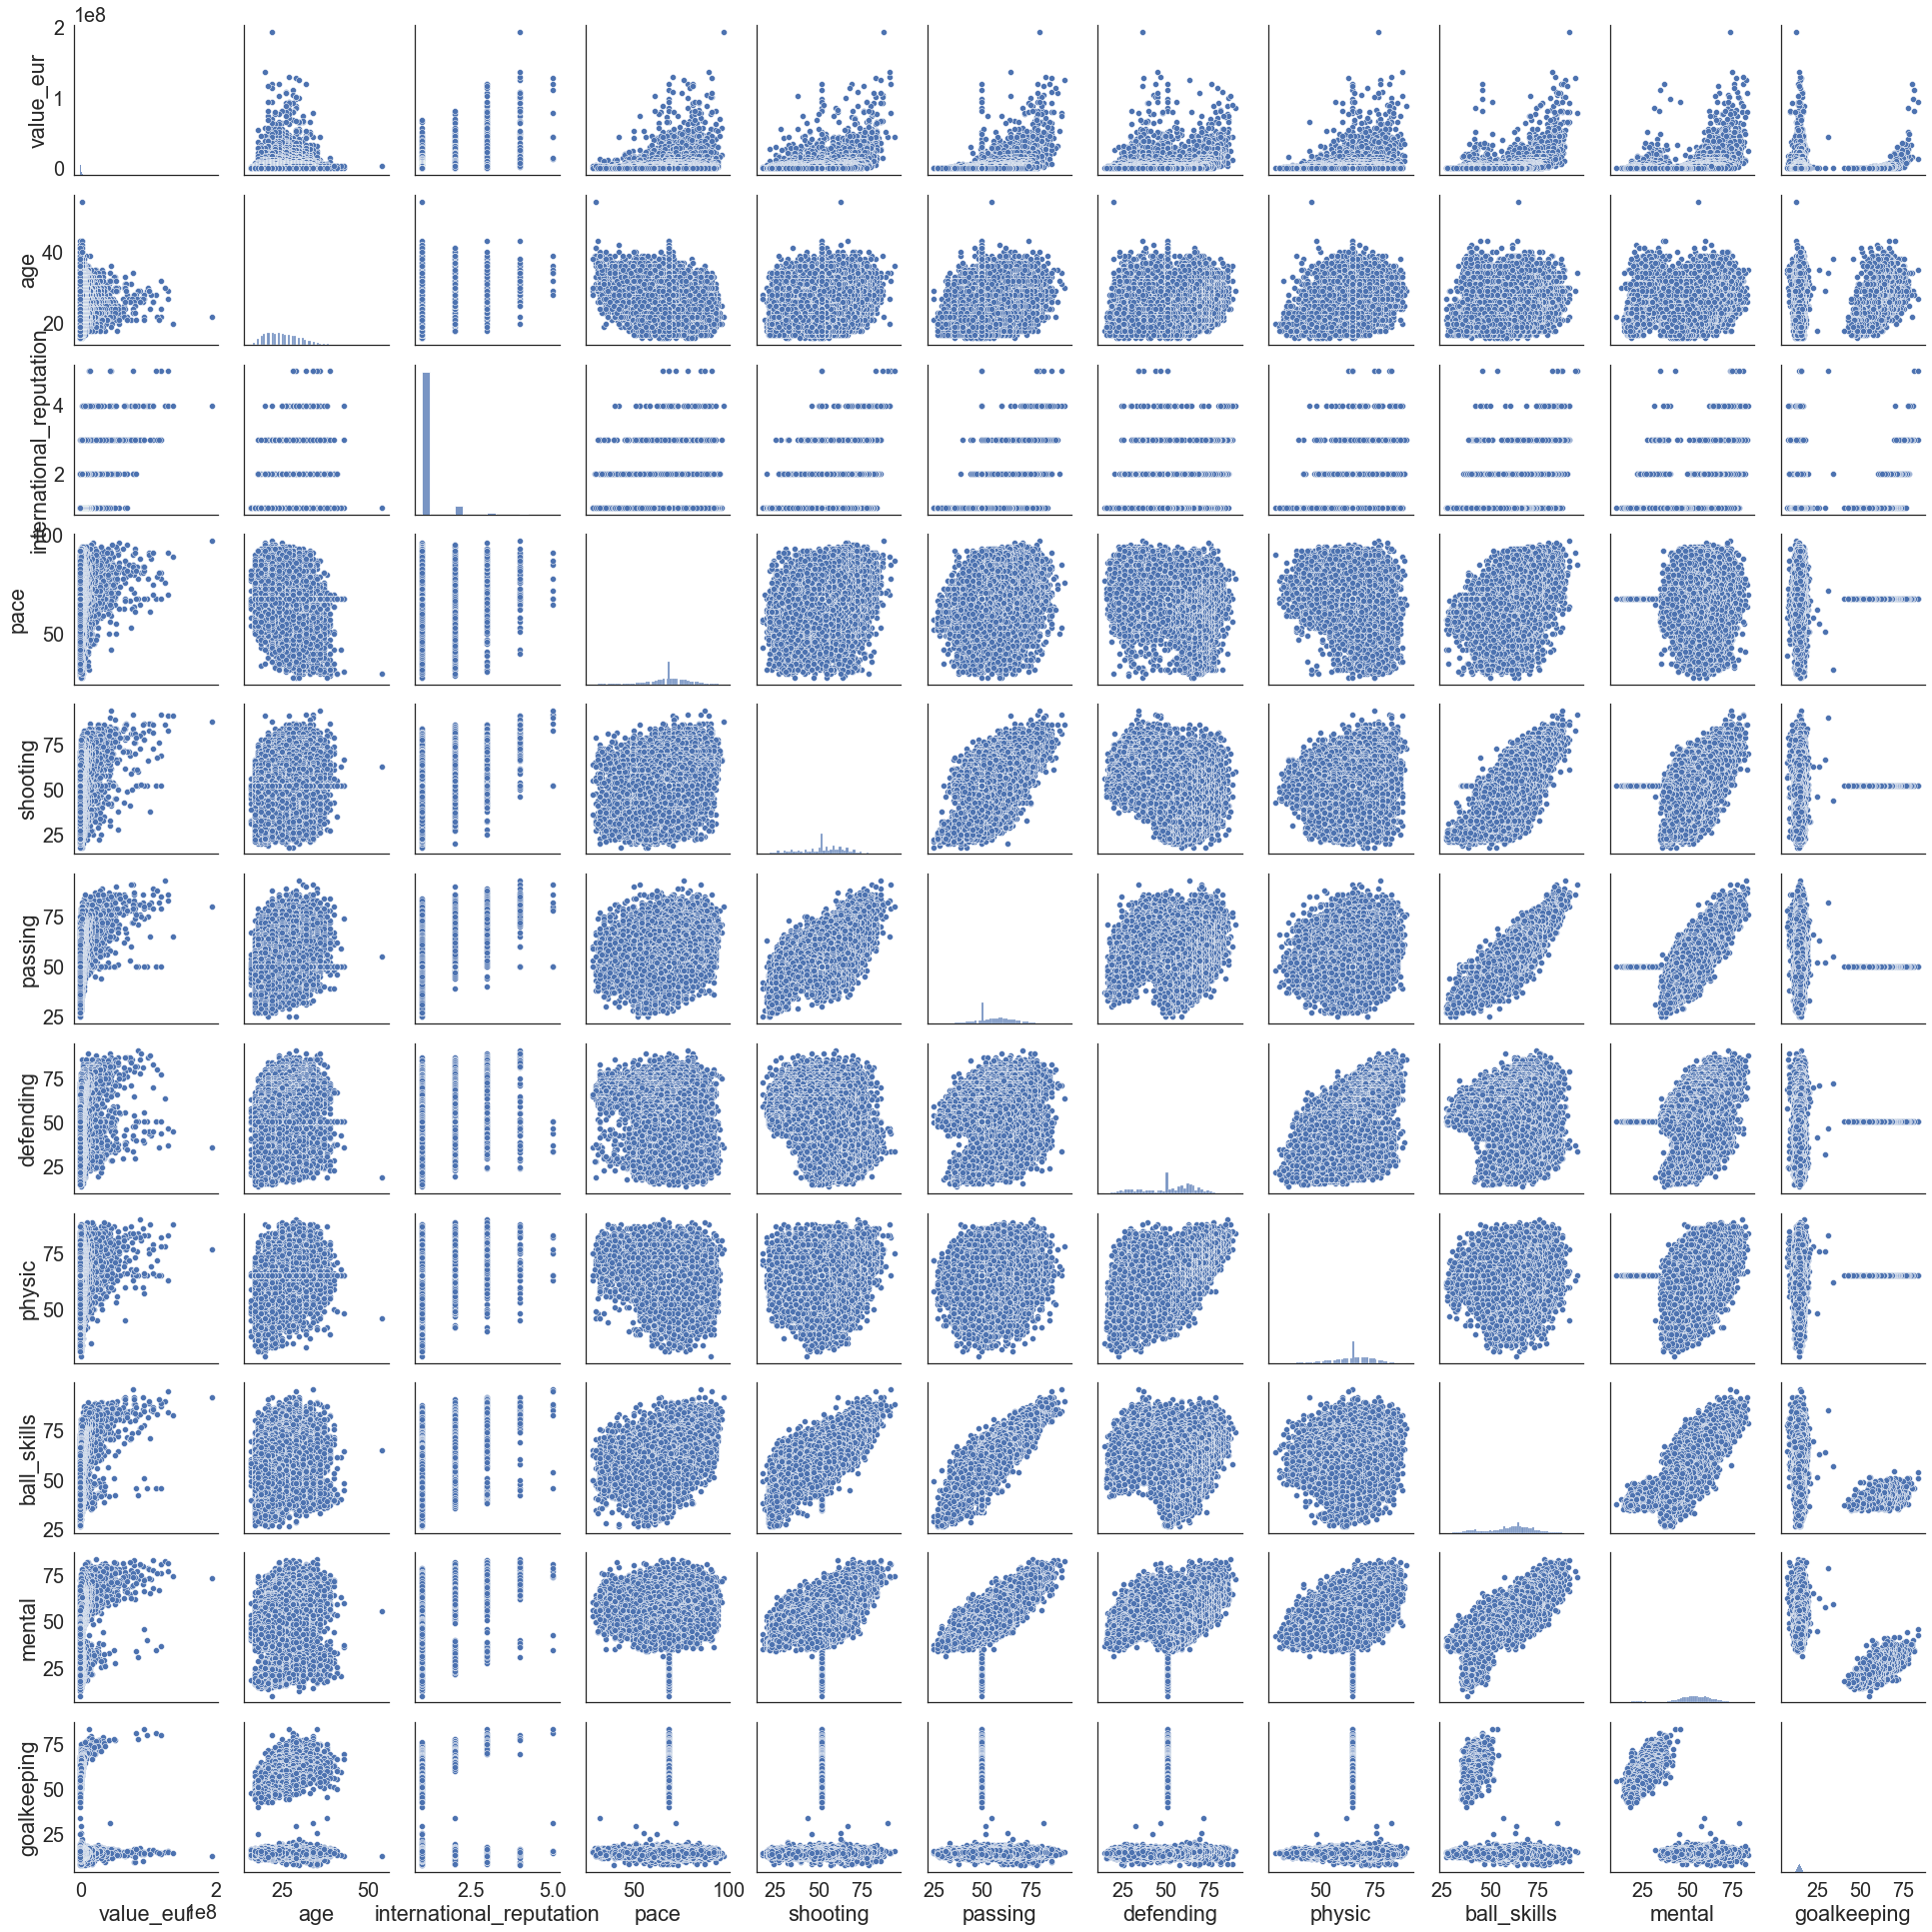

In [29]:
sns.set(style='white',font_scale=1.8)
sns.pairplot(players_22)
plt.savefig('pairplot1.png',transparent=True, bbox_inches='tight')

In [30]:
l = list(players_22['value_eur'] == 0)
print('Zeros in output label: ',len([v for v in l if v==True] ))
print('\nNaN values in following features:')
players_22.isnull().any()

Zeros in output label:  0

NaN values in following features:


short_name                  False
value_eur                   False
age                         False
international_reputation    False
pace                        False
shooting                    False
passing                     False
defending                   False
physic                      False
ball_skills                 False
mental                      False
goalkeeping                 False
dtype: bool

In [31]:
y, X = patsy.dmatrices("Q('value_eur') ~ age + international_reputation + Q('ball_skills') + defending + mental + passing + physic + shooting + goalkeeping", data=players_22, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Q('value_eur')   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     2105.
Date:                Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                        03:49:10   Log-Likelihood:            -3.2551e+05
No. Observations:               19239   AIC:                         6.510e+05
Df Residuals:                   19229   BIC:                         6.511e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -2.542e+07    4.1e+05    -62.052      0.000   -2.62e+07   -2.46e+07
age                       -3.98e+05   9990.934    -39.839      0.000   -4.18e+05   -3.78e+05
international_reputation   1.12e+07   1.15e+05     97.047      0.000     1.1e+07    1.14e+07
Q('ball_skills')          1.955e+05   1.01e+04     19.292      0.000    1.76e+05    2.15e+05
defending                 1.134e+04   5155.158      2.199      0.028    1233.208    2.14e+04
mental                    8.281e+04   1.09e+04      7.611      0.000    6.15e+04    1.04e+05
passing                  -4067.5368   9885.314     -0.411      0.681   -2.34e+04    1.53e+04
physic                    1.128e+05   5910.291     19.077      0.000    1.01e+05    1.24e+05
shooting                 -1.158e+04   6595.011     -1.756      0.079   -2.45e+04    1344.861
goalkeeping               1.462e+05   6904.328     21.173      0.000    1.33e+05     1.6e+05
==============================================================================
Omnibus:                    23003.889   Durbin-Watson:                   0.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6891993.059
Skew:                           6.053   Prob(JB):                         0.00
Kurtosis:                      94.929   Cond. No.                     1.51e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
players_22_norm = players_22.copy()

In [33]:
players_22_norm['value_eur'] = np.log(players_22['value_eur'])

In [34]:
players_22_norm['ball_skills']=players_22_norm['ball_skills']/10
players_22_norm['defending']=players_22_norm['defending']/10
players_22_norm['mental']=players_22_norm['mental']/10
players_22_norm['passing']=players_22_norm['passing']/10
players_22_norm['physic']=players_22_norm['physic']/10
players_22_norm['pace']=players_22_norm['pace']/10
players_22_norm['shooting']=players_22_norm['shooting']/10
players_22_norm['goalkeeping']=players_22_norm['goalkeeping']/10

In [35]:
players_22_norm = players_22_norm.rename(columns={'value_eur':'Log Market Value'})

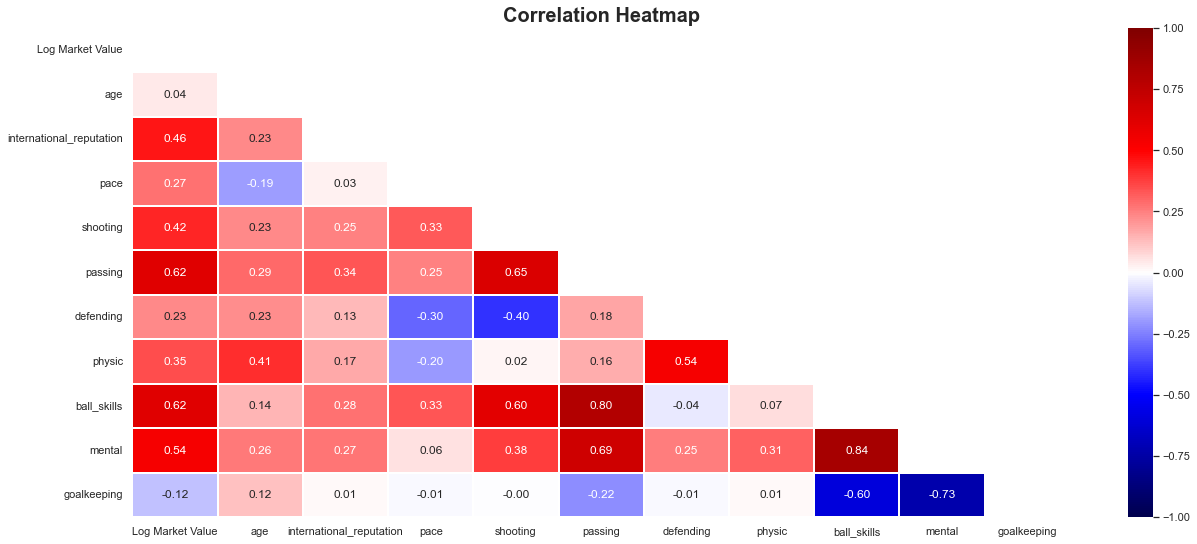

In [36]:
sns.set(font_scale=1,style='white')
corr_matrix = players_22_norm.corr()
fig = plt.figure(figsize=[21,9])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1.5,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
plt.savefig('heatmap3.png',transparent=True, bbox_inches='tight')

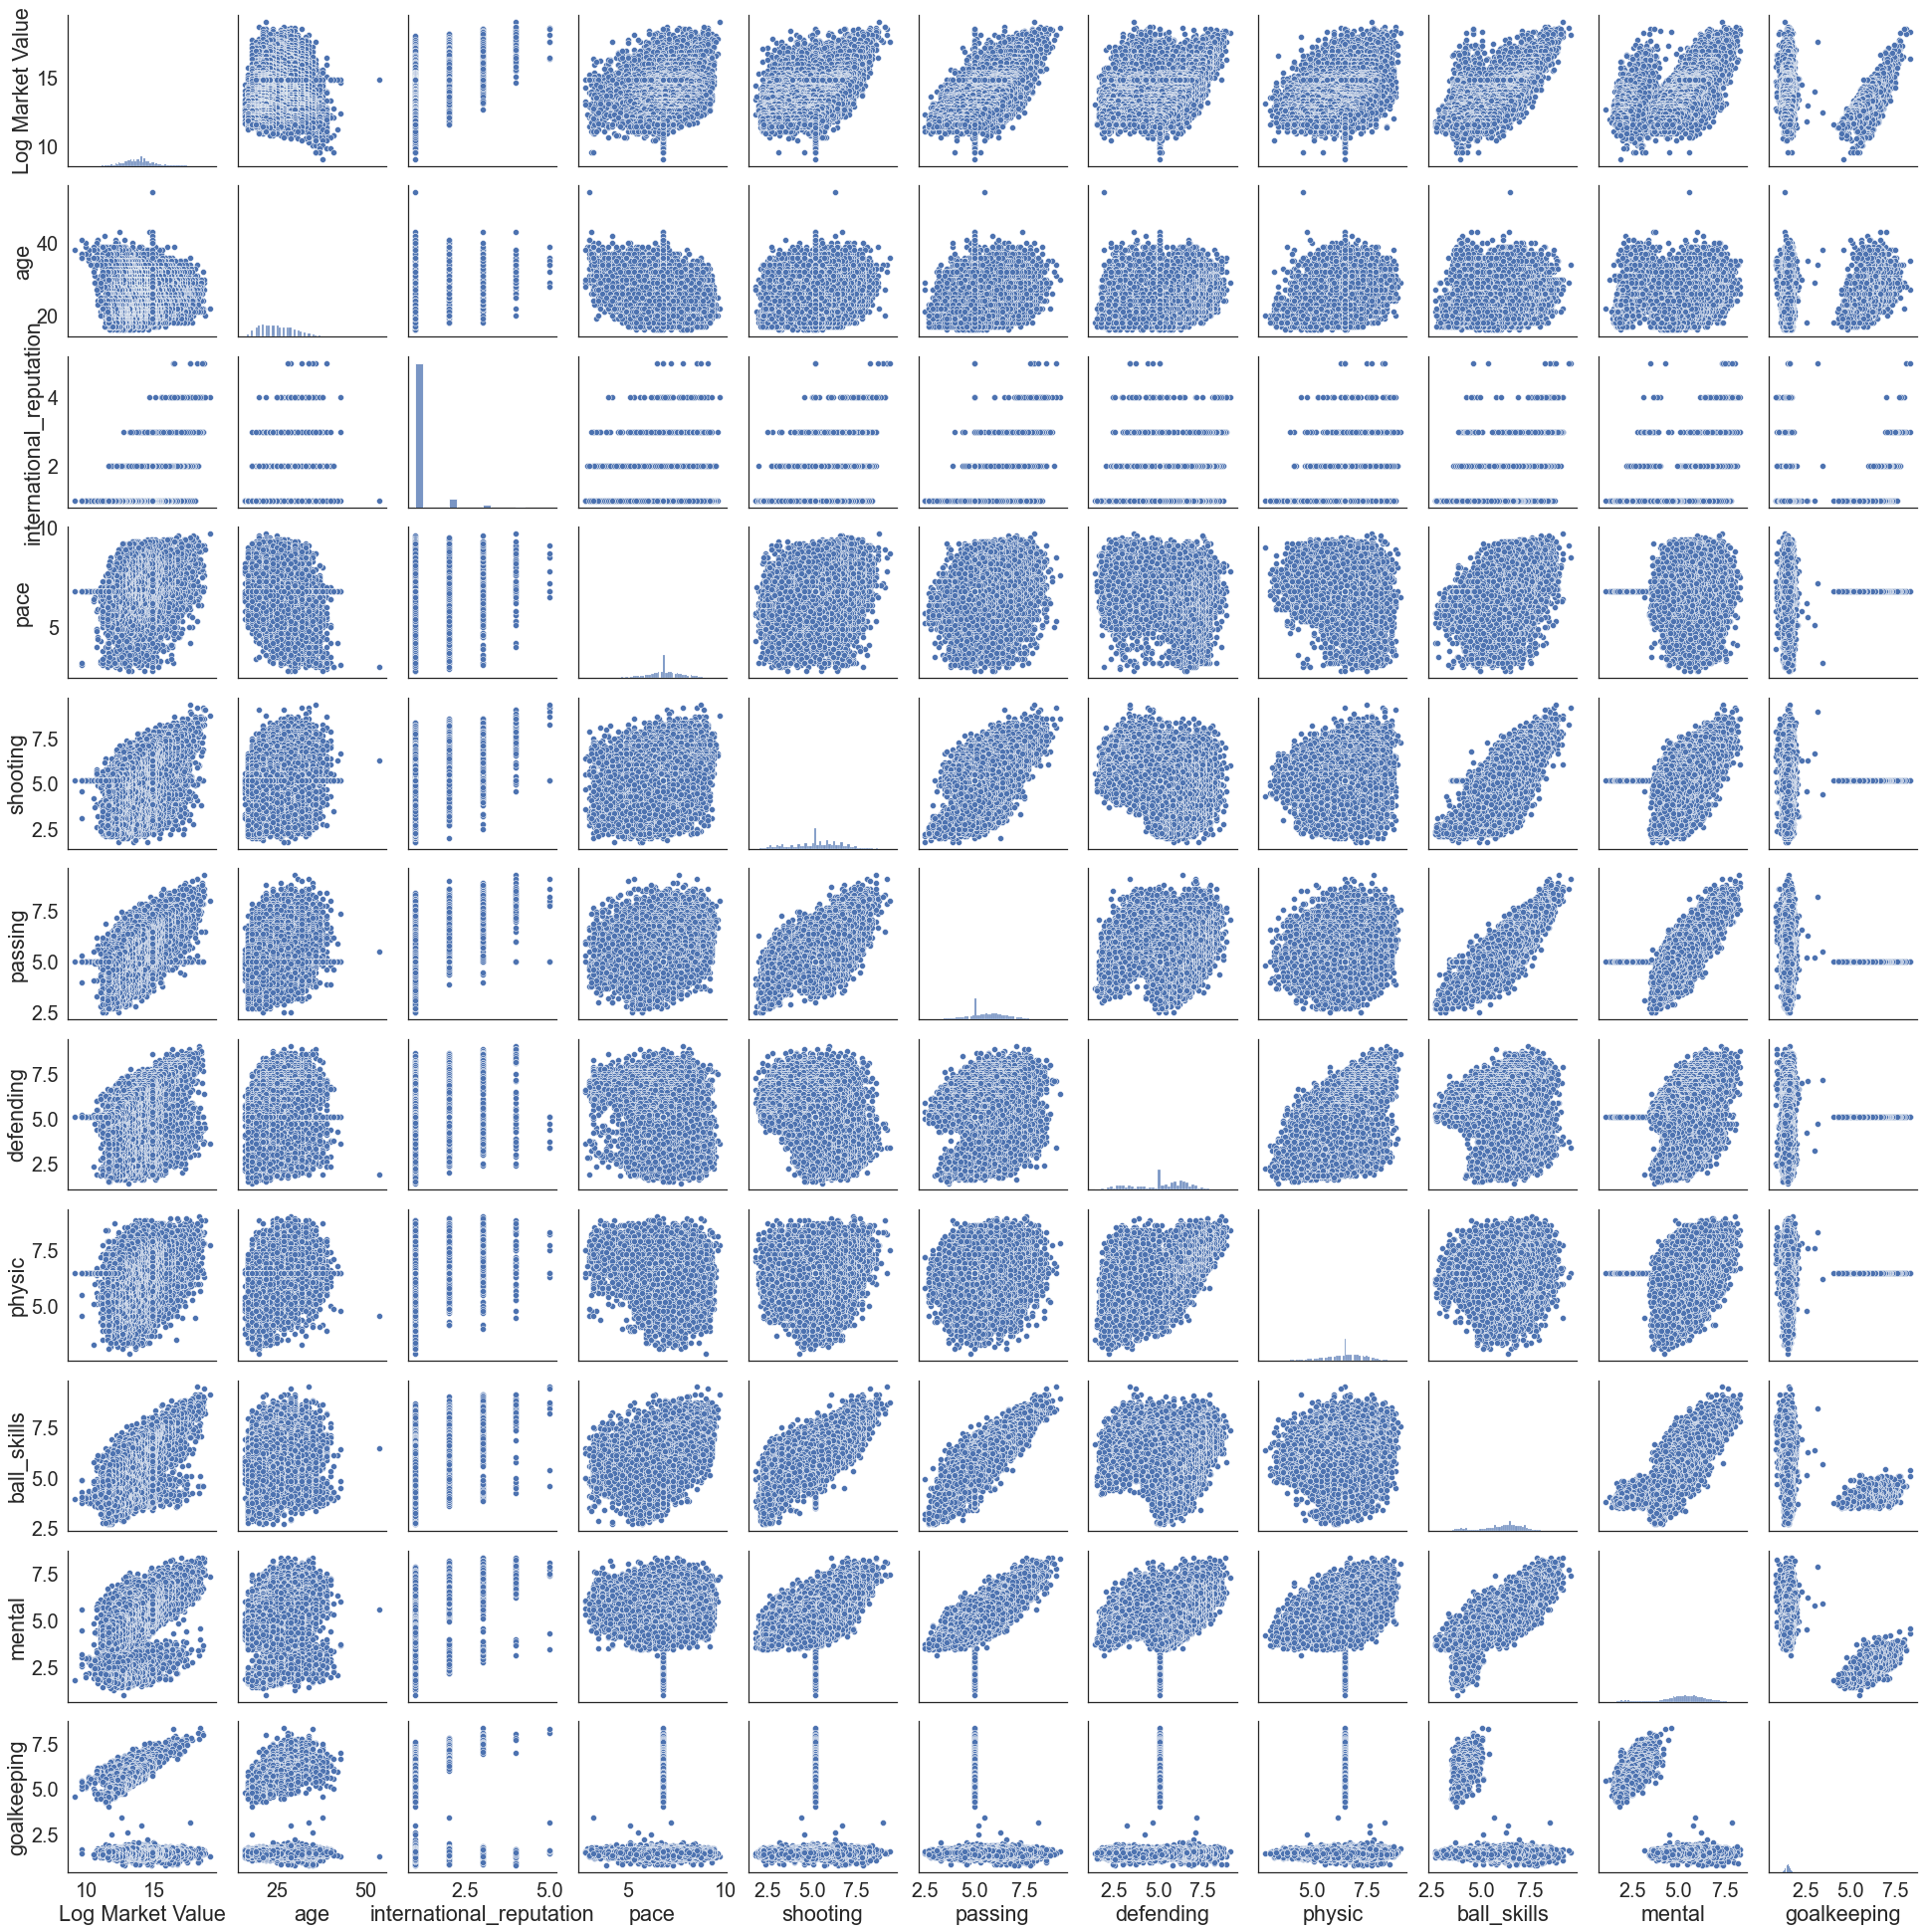

In [37]:
sns.set(style='white',font_scale=1.8)
sns.pairplot(players_22_norm)
plt.savefig('pairplot2.png',transparent=True, bbox_inches='tight')

In [38]:
y, X = patsy.dmatrices("Q('Log Market Value') ~ age + international_reputation + Q('ball_skills') + defending + mental + passing + physic + shooting + goalkeeping", data=players_22_norm, return_type="dataframe")
model = sm.OLS(y, X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Q('Log Market Value')   R-squared:                       0.718
Model:                               OLS   Adj. R-squared:                  0.718
Method:                    Least Squares   F-statistic:                     5439.
Date:                   Mon, 11 Jul 2022   Prob (F-statistic):               0.00
Time:                           03:50:01   Log-Likelihood:                -19096.
No. Observations:                  19239   AIC:                         3.821e+04
Df Residuals:                      19229   BIC:                         3.829e+04
Df Model:                              9                                         
Covariance Type:               nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    5.7847      0.050    116.631      0.000       5.687       5.882
age                         -0.0947      0.001    -78.304      0.000      -0.097      -0.092
international_reputation     0.7066      0.014     50.591      0.000       0.679       0.734
Q('ball_skills')             0.8934      0.012     72.818      0.000       0.869       0.917
defending                    0.0680      0.006     10.900      0.000       0.056       0.080
mental                       0.3502      0.013     26.586      0.000       0.324       0.376
passing                     -0.1501      0.012    -12.538      0.000      -0.174      -0.127
physic                       0.3479      0.007     48.624      0.000       0.334       0.362
shooting                    -0.0678      0.008     -8.491      0.000      -0.083      -0.052
goalkeeping                  0.5564      0.008     66.570      0.000       0.540       0.573
==============================================================================
Omnibus:                      821.701   Durbin-Watson:                   1.404
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1259.796
Skew:                           0.392   Prob(JB):                    2.75e-274
Kurtosis:                       3.978   Cond. No.                         312.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(pred,y,alpha=0.1)
    plt.plot(y, y, color='red',linewidth=1,)
    plt.title("Regression fit")
    plt.xlabel("Predicted y")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt,)
    plt.title("Normal Q-Q plot")
    
    lin_mse = mean_squared_error(y, pred)
    lin_rmse = np.sqrt(lin_mse)
    lin_rmse
    
    score = r2_score(y, pred)  
    print('Accuracy:',format(score*100,'.2f'),'%')

In [40]:
y = players_22_norm['Log Market Value']
X = players_22_norm.drop(['short_name','Log Market Value'],axis=1)

Accuracy: 72.05 %


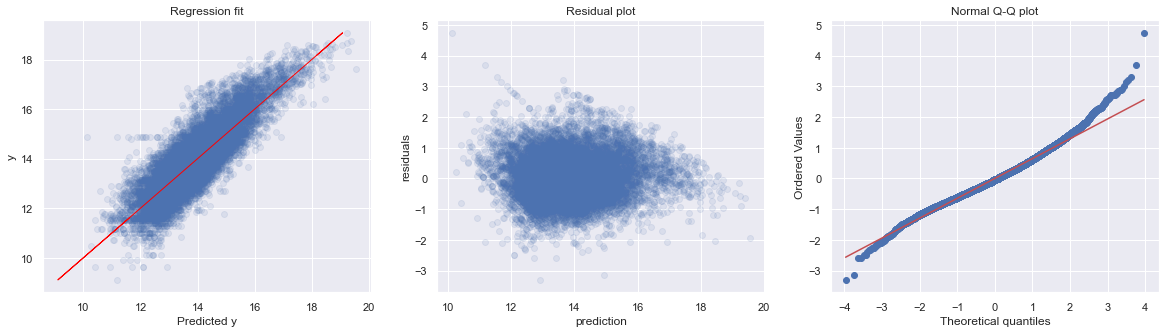

In [41]:
sns.set(style='darkgrid')
diagnostic_plot(X, y)

# Analysis of the target variable 

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


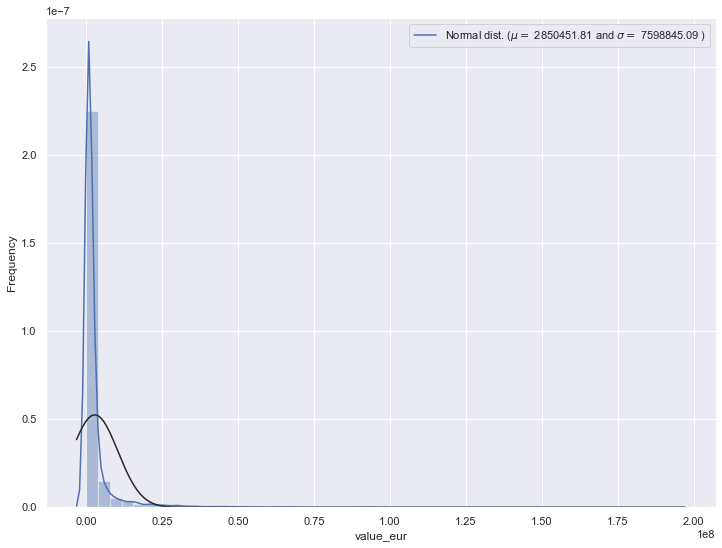

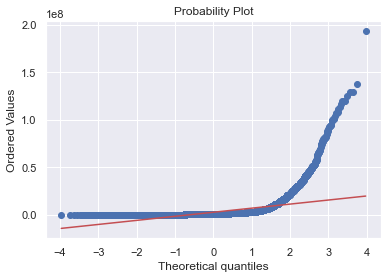

In [42]:
plt.subplots(figsize=(12,9))
sns.distplot(players_22['value_eur'], fit=stats.norm)

# Getting the fitted parameters used by the function:
(mu, sigma) = stats.norm.fit(players_22['value_eur'])

# plotting with the distribution:
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Probablity plot:
fig = plt.figure()
stats.probplot(players_22['value_eur'], plot=plt)
plt.show()

In [43]:
# analysis of the kurtosis and the skewness to check the normality of the variable:
kurt = players_22['value_eur'].kurtosis()
skew = players_22['value_eur'].skew()
print('Death Kurtorsis {}'.format(kurt))
print('Death Skewness {}'.format(skew))

Death Kurtorsis 98.28700718218585
Death Skewness 8.202130313699582


# Normalization

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


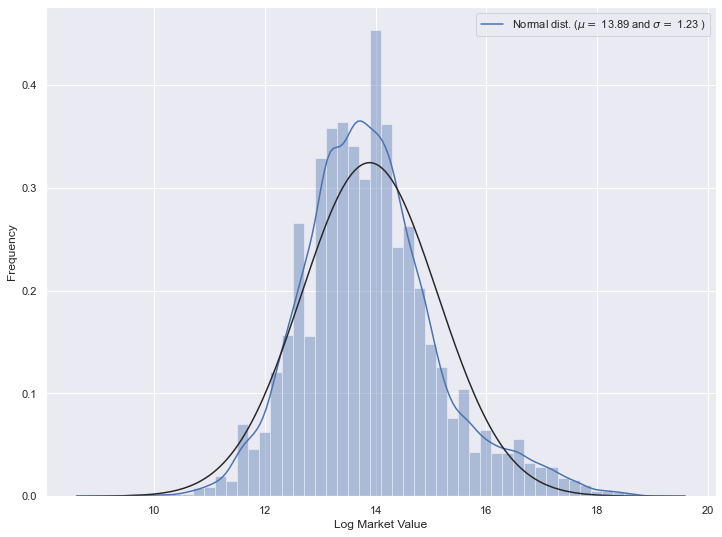

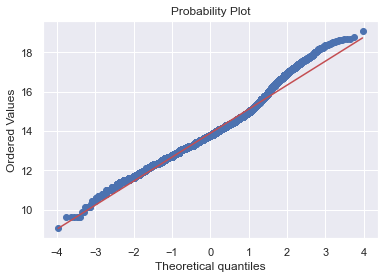

In [44]:
# Using log function for normalize the target variable:
#players_22_norm['Log Market Value'] = np.log(players_22_norm['Log Market Value'])

# Checking to see the  normal distribution of the variable now:

plt.subplots(figsize=(12,9))
sns.distplot(players_22_norm['Log Market Value'], fit=stats.norm)

# Getting the fitted parameters used by the function:

(mu, sigma) = stats.norm.fit(players_22_norm['Log Market Value'])

# plotting with the distribution now:

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

# Probablity plot:

fig = plt.figure()
stats.probplot(players_22_norm['Log Market Value'], plot=plt)
plt.show()

In [45]:
# after normalize the variable. we check again the analysis of the kurtosis and the skewness to check the normality of the variable:

kurt = players_22_norm['Log Market Value'].kurtosis()
skew = players_22_norm['Log Market Value'].skew()
print('Death Kurtorsis {}'.format(kurt))
print('Death Skewness {}'.format(skew))

Death Kurtorsis 0.8421555842411341
Death Skewness 0.5806550259345896


# Feature Selection
I selected below features which could be best used to predict a player's market value.

In [46]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [47]:
selected_columns = ['age','international_reputation','defending','passing','physic','shooting','goalkeeping']

# LASSO

In [48]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso_model = Lasso(alpha = 0.1)    
lasso_model.fit(X_train_val[selected_columns], y_train_val)
list(zip(selected_columns, lasso_model.coef_))
## doing feature selection with Lasso

[('age', -0.05779761286650273),
 ('international_reputation', 0.20105354034534603),
 ('defending', 0.07111815094823389),
 ('passing', 0.5410825882385853),
 ('physic', 0.29576672878625015),
 ('shooting', 0.14238206469947629),
 ('goalkeeping', 0.0)]

In [49]:
std = StandardScaler()
std.fit(X_train_val.values)
X_tr = std.transform(X_train_val.values)
X_te = std.transform(X_test.values)
## Scaling x values for lasso,ridge,elastic net

In [50]:
kf = KFold(n_splits=5, shuffle=True, random_state = 71)

In [51]:
alphavec = 10**np.linspace(-15,4,400)
lasso_model = LassoCV(alphas = alphavec, cv=kf)
lasso_model.fit(X_tr, y_train_val)
lasso_model.alpha_
## finding alpha value that gives lowest MAE for Lasso CV

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.80408179876576, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.24821259608234, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 68.67239502899065, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(


8.03085722139152e-14

# RIDGE

In [52]:
alphavec = 10**np.linspace(-2,2,200)
ridge_model = RidgeCV(alphas = alphavec, cv=kf)
ridge_model.fit(X_tr, y_train_val)
ridge_model.alpha_
## finding alpha value that gives lowest MAE for Ridge CV

0.29331662783900436

In [53]:
list(zip(X_train_val.columns, ridge_model.coef_))
# finding coefficients for optimum alpha value for Ridge

[('age', -0.436790533770118),
 ('international_reputation', 0.26273459215232),
 ('pace', 0.07315243733445527),
 ('shooting', -0.08102498389540264),
 ('passing', -0.16009725140227624),
 ('defending', 0.12184925874901939),
 ('physic', 0.31624335566163136),
 ('ball_skills', 0.9661744038101991),
 ('mental', 0.47596141030938793),
 ('goalkeeping', 0.7866195005392105)]

In [92]:
#ridge_model_final = Ridge(alpha = 0.9329304026284686) 
ridge_model_final = Ridge(alpha = 0.9329304026284686) 
Mean_R2_Ridge_CV = np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Ridge_CV
# scoring the Ridge model based on CV

0.7216975927668473

In [55]:
Std_R2_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='r2'))
Std_R2_Ridge_CV

0.005157099064332059

In [56]:
Mean_MAE_Ridge_CV = -np.mean(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Ridge_CV
# scoring the Ridge model based on CV

0.5050706691127032

In [57]:
Std_MAE_Ridge_CV = np.std(cross_val_score(ridge_model_final, X_tr, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Ridge_CV

0.006853273070692625

# ElasticNetCV

In [58]:
alphavec = 10**np.linspace(-22,-17,300)
elastic_model = ElasticNetCV(alphas = alphavec, cv=kf)
elastic_model.fit(X_tr, y_train_val)
elastic_model.alpha_
## finding alpha value that gives lowest MAE for ElasticNet CV

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2839.2870834115197, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2877.7562571817125, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2811.791479291287, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2919.98487310043, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2907.6711035972353, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2937.177535154787, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2933.968296733371, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.480992717472, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2946.259582957318, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.0640349758223, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.080972014777, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2947.8903592099537, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.4492514952117, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.0369257064267, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.3968129556183, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.430190673191, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.4914240636344, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.361515136982, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.5082998728776, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.5096075417496, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2948.5084866635166, tolerance: 2.1143503530856247
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2863.397716838779, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2831.5003080478045, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2895.612024927377, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-package

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2901.267314624991, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2910.124414670681, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2897.7970639249424, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-package

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2922.121539265767, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2922.9711845197903, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2922.6502708850326, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packag

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2923.316231948942, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2923.3232792740687, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2923.4163821874968, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packag

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2923.4944683852964, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2923.4868479604816, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2923.4925353086783, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2923.5014392868693, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2923.501487344169, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2923.500355618397, tolerance: 2.118227326585244
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-package

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2784.92888611167, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2787.2574584319523, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2686.5424103570595, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-package

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2874.1621665071657, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2896.449707286635, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2896.608824542724, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-package

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.2518639772807, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.049332381779, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.4266474348447, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packag

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.656252918091, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.6246560151058, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.6682085561624, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packag

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.701980650905, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.6990498826426, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.6994103169486, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packag

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.707029354409, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.7078398121926, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2900.707434352073, tolerance: 2.093848801392924
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-package

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2745.5168544507765, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2888.6446541832415, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2875.6134335410247, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2922.086055386186, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2928.511444912767, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2928.7290243626508, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2933.8400899843837, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2933.550448661824, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2933.585986755748, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.375587493196, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.3800415965825, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.4207199392517, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.481805972751, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.4822479561863, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.4718388742863, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.48936989156, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.492180548986, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2934.4922306801877, tolerance: 2.1014001532297057
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2898.713973472848, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2899.077584880345, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2904.677709715078, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2907.773382296119, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2907.8145744111043, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2907.85441159792, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2908.6557058846165, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2908.5967732885074, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2908.671142641922, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pac

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2908.8487810959014, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2908.840586803984, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2908.845219654494, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-pack

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2908.861958741032, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2908.861647941656, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2908.861735582544, tolerance: 2.1031912642256647
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packa

C:\Users\Kiko\anaconda3\anaconda3_new\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3452.1943922241708, tolerance: 2.63279983036001
  model = cd_fast.enet_coordinate_descent(


5.400593278542374e-18

# Linear Regression

In [59]:
lm = LinearRegression()

Mean_R2_Linear_CV = np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Linear_CV 
# scoring the LR model based on CV

0.7216976178909785

In [60]:
Std_R2_Linear_CV = np.std(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='r2'))
Std_R2_Linear_CV 

0.005154889468674209

In [61]:
Mean_MAE_Linear_CV = - np.mean(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Linear_CV 

0.5050736981105131

In [62]:
Std_MAE_Linear_CV = np.std(cross_val_score(lm, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Linear_CV 

0.006854646495520453

In [63]:
X_train_val = X_train_val.reset_index().drop('sofifa_id',axis=1)
y_train_val = y_train_val.reset_index().drop('sofifa_id',axis=1)

In [64]:
err_vector = []

for degree in range(2,6):
    mae = []
    for train_index, test_index in kf.split(X_train_val):
        
        X_train1, X_test1 = X_train_val.loc[train_index], X_train_val.loc[test_index]
        y_train1, y_test1 = y_train_val.loc[train_index], y_train_val.loc[test_index]        
        
        poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        poly.fit(X_train1,y_train1)
        
        predict = poly.predict(X_test1)
        mae.append(mean_absolute_error(y_test1, predict))
    err_vector.append(np.mean(mae))
    print(degree)

2
3
4
5


In [65]:
err_vector

[0.265577012115365, 0.23101605923020294, 0.23686766804517, 6.5626915144001625]

In [66]:
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())

Mean_R2_Poly_CV = np.mean(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='r2'))
Mean_R2_Poly_CV 

0.8873792714764506

In [67]:
Std_R2_Poly_CV = np.std(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='r2'))
Std_R2_Poly_CV

0.08227949872485651

In [68]:
Mean_MAE_Poly_CV =  - np.mean(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Mean_MAE_Poly_CV 

0.2368676680485547

In [69]:
Std_MAE_Poly_CV = np.std(cross_val_score(poly, X_train_val, y_train_val, cv=kf, scoring='neg_mean_absolute_error'))
Std_MAE_Poly_CV 

0.004452125878266682

In [70]:
print(f'Mean R2 Linear is: {Mean_R2_Linear_CV:.3f} +- {Std_R2_Linear_CV:.3f}')
print(f'Mean R2 Ridge is: {Mean_R2_Ridge_CV:.3f} +- {Std_R2_Ridge_CV:.3f}')
print(f'Mean R2 Poly is: {Mean_R2_Poly_CV:.3f} +- {Std_R2_Poly_CV:.3f}')

Mean R2 Linear is: 0.722 +- 0.005
Mean R2 Ridge is: 0.722 +- 0.005
Mean R2 Poly is: 0.887 +- 0.082


In [71]:
print(f'Mean MAE Linear is: {Mean_MAE_Linear_CV:.3f} +- {Std_MAE_Linear_CV:.3f}')
print(f'Mean MAE Ridge is: {Mean_MAE_Ridge_CV:.3f} +- {Std_MAE_Ridge_CV:.3f}')
print(f'Mean MAE Poly is: {Mean_MAE_Poly_CV:.3f} +- {Std_MAE_Poly_CV:.3f}')

Mean MAE Linear is: 0.505 +- 0.007
Mean MAE Ridge is: 0.505 +- 0.007
Mean MAE Poly is: 0.237 +- 0.004


In [72]:
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly.fit(X_train_val,y_train_val)
predicted = poly.predict(X_test)
print('R2 score on test set is: {}'.format(r2_score(y_test, predicted)))
print('MSE score on test set is: {}'.format(mean_absolute_error(y_test, predicted)))

R2 score on test set is: 0.8876339560709539
MSE score on test set is: 0.24054605065857368


In [95]:
def diagnostic_plot2(x_train, y_train, x_test, y_test):
    plt.figure(figsize=(22,8))
    
  #  poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
  #  poly.fit(x_train,y_train)
  #  pred = poly.predict(x_test)
    
    rgr = LinearRegression()
    rgr.fit(x_train,y_train)
    pred = rgr.predict(x_test)    

    plt.subplot(1, 2, 1)
    plt.scatter(pred,y_test,alpha=0.1)
    plt.plot(y_test, y_test, color='red',linewidth=1,label='Identity Line (Log Market Value)')
    plt.title("Regression Fit on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Log Market Value")
    plt.legend(loc='lower right')
    sns.despine()
    
    plt.subplot(1, 2, 2)
    res = np.array(y_test).reshape(-1,1) - pred
    plt.scatter(pred, res,alpha=0.1)
    plt.title("Residual Plot on Test Set",weight='bold')
    plt.xlabel("Log Predicted Market Value")
    plt.ylabel("Residuals")
    sns.despine()
    
 #   plt.subplot(1, 3, 3)
 #   #Generates a probability plot of sample data against the quantiles of a 
 #   # specified theoretical distribution 
 #   stats.probplot(res.T[0], dist="norm", plot=plt,)
 #   plt.title("Normal Q-Q plot")

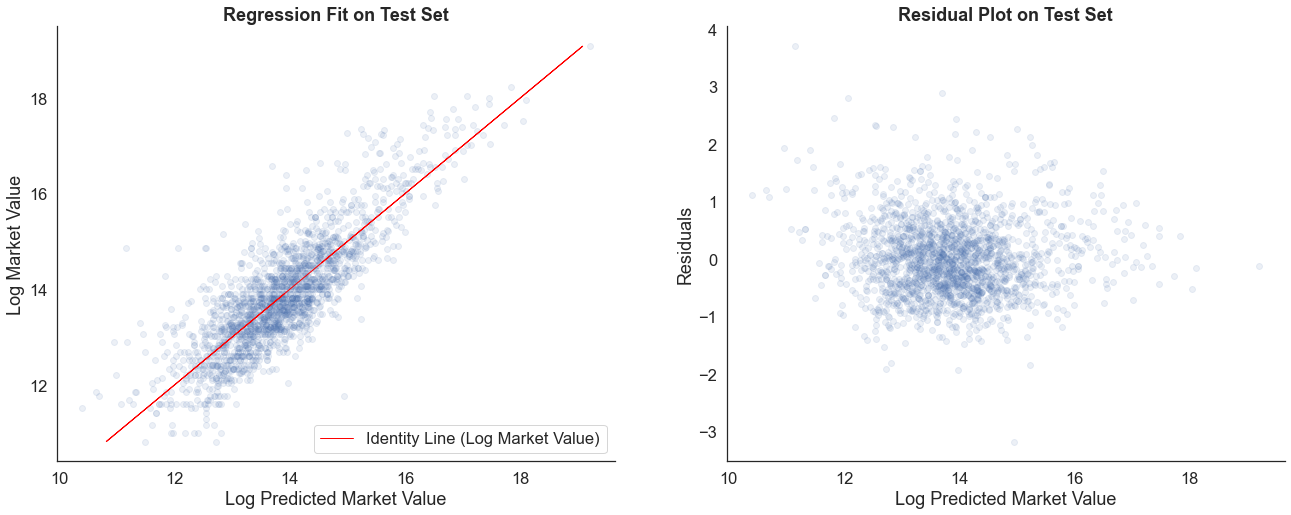

In [96]:
sns.set(style='white',font_scale=1.5)
diagnostic_plot2(X_train_val, y_train_val,X_test,y_test)
plt.savefig('regression1.png',transparent=True, bbox_inches='tight')

In [75]:
poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
poly.fit(X_train_val,y_train_val)
predicted = poly.predict(X_test)
predicted

array([[13.91932713],
       [12.55798059],
       [12.13142686],
       ...,
       [14.3384767 ],
       [15.33494139],
       [14.31978629]])

In [99]:
rgr = LinearRegression()
rgr.fit(X_train_val,y_train_val)
predicted = rgr.predict(X_test)    
predicted

array([[14.56280206],
       [12.85165092],
       [12.4074487 ],
       ...,
       [14.36626213],
       [15.26860047],
       [14.50784692]])

In [100]:
Test_Set = pd.DataFrame(y_test).join(X_test).join(pd.DataFrame(players_22_norm['short_name']))
Test_Set['Log Market Value'] = np.exp(Test_Set['Log Market Value'] )
Test_Set = Test_Set.rename(columns={'Log Market Value':'Market Value'})
Test_Set['Predicted Market Value'] = np.exp(predicted)
Test_Set = Test_Set.sort_values(by='Predicted Market Value',ascending=False)
#Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))


In [101]:
Test_Set

Market Value  age  international_reputation  pace  shooting  \
sofifa_id                                                                
231747      194000000.0   22                         4   9.7       8.8   
232656       62500000.0   23                         3   9.3       7.1   
181291       40500000.0   30                         3   7.7       7.5   
216267       83500000.0   27                         3   8.4       6.1   
224334       37000000.0   29                         2   7.6       7.4   
...                 ...  ...                       ...   ...       ...   
231634         200000.0   30                         1   5.4       2.4   
170342         400000.0   33                         1   3.0       3.2   
262466         130000.0   32                         1   5.1       3.1   
238250         140000.0   27                         1   5.2       2.3   
255551         100000.0   24                         1   4.2       2.4   

           passing  defending  physic  ball_skills    mental  goalkeeping  \
sofifa_id                                                                   
231747         8.0        3.6     7.7         9.15  7.350000     1.300000   
232656         7.6        7.7     8.2         8.00  7.400000     1.316667   
181291         8.0        7.9     7.9         8.70  7.883333     1.500000   
216267         8.1        8.2     7.6         8.20  7.716667     1.433333   
224334         8.2        7.9     8.2         8.75  8.150000     1.633333   
...            ...        ...     ...          ...       ...          ...   
231634         3.7        6.1     6.6         3.25  4.566667     1.450000   
170342         3.8        6.7     7.0         3.50  5.000000     1.300000   
262466         3.9        5.7     6.7         3.50  4.166667     1.300000   
238250         2.9        5.8     6.2         2.70  4.116667     1.533333   
255551         3.0        5.1     6.1         2.70  3.683333     1.233333   

              short_name  Predicted Market Value  
sofifa_id                                         
231747         K. Mbappé            2.188579e+08  
232656      T. Hernández            7.259231e+07  
181291      G. Wijnaldum            6.856135e+07  
216267      A. Robertson            5.571657e+07  
224334          M. Acuña            4.950033e+07  
...                  ...                     ...  
231634          T. Uskok            5.947467e+04  
170342     P. Huntington            5.748527e+04  
262466         A. Nastos            4.402832e+04  
238250      Kim Yeon Soo            4.179076e+04  
255551     Cho Suk Young            3.297115e+04  

[1924 rows x 13 columns]

In [103]:
Test_Set = Test_Set[['short_name','Market Value','Predicted Market Value','age','international_reputation','defending','passing','physic','shooting','goalkeeping']]
Test_Set.reset_index(inplace=True)
Test_Set.drop('index',axis=1,inplace=True)
Test_Set

C:\Users\Kiko\AppData\Local\Temp/ipykernel_9988/2366295332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Set.drop('index',axis=1,inplace=True)


short_name  Market Value  Predicted Market Value  age  \
0         K. Mbappé   194000000.0            2.188579e+08   22   
1      T. Hernández    62500000.0            7.259231e+07   23   
2      G. Wijnaldum    40500000.0            6.856135e+07   30   
3      A. Robertson    83500000.0            5.571657e+07   27   
4          M. Acuña    37000000.0            4.950033e+07   29   
...             ...           ...                     ...  ...   
1919       T. Uskok      200000.0            5.947467e+04   30   
1920  P. Huntington      400000.0            5.748527e+04   33   
1921      A. Nastos      130000.0            4.402832e+04   32   
1922   Kim Yeon Soo      140000.0            4.179076e+04   27   
1923  Cho Suk Young      100000.0            3.297115e+04   24   

      international_reputation  defending  passing  physic  shooting  \
0                            4        3.6      8.0     7.7       8.8   
1                            3        7.7      7.6     8.2       7.1   
2                            3        7.9      8.0     7.9       7.5   
3                            3        8.2      8.1     7.6       6.1   
4                            2        7.9      8.2     8.2       7.4   
...                        ...        ...      ...     ...       ...   
1919                         1        6.1      3.7     6.6       2.4   
1920                         1        6.7      3.8     7.0       3.2   
1921                         1        5.7      3.9     6.7       3.1   
1922                         1        5.8      2.9     6.2       2.3   
1923                         1        5.1      3.0     6.1       2.4   

      goalkeeping  
0        1.300000  
1        1.316667  
2        1.500000  
3        1.433333  
4        1.633333  
...           ...  
1919     1.450000  
1920     1.300000  
1921     1.300000  
1922     1.533333  
1923     1.233333  

[1924 rows x 10 columns]

In [104]:
mean_absolute_error(Test_Set['Market Value'],Test_Set['Predicted Market Value'])

1271640.4032924161

In [105]:
r2_score(Test_Set['Market Value'],Test_Set['Predicted Market Value'])

0.750988584530568

In [106]:
stats.kurtosis(Test_Set['Market Value']-Test_Set['Predicted Market Value'])

51.554474782272486

In [107]:
def diagnostic_plot3(x_train, y_train, x_test, y_test):
    plt.figure(figsize=(22,8))
    
    poly = make_pipeline(PolynomialFeatures(4), LinearRegression())
    poly.fit(x_train,y_train)
    pred = poly.predict(x_test)

    plt.subplot(1, 2, 1)
    plt.scatter(np.exp(pred),np.exp(y_test),alpha=0.1)
    plt.plot(np.exp(y_test), np.exp(y_test), color='red',linewidth=1,label='Identity Line (Market Value)')
    plt.title("Regression Fit on Test Set",weight='bold')
    plt.xlabel("Predicted Market Value")
    plt.ylabel("Market Value")
    plt.legend()
    sns.despine()
    
    plt.subplot(1, 2, 2)
    res = np.exp(np.array(y_test)).reshape(-1,1) - np.exp(pred)
    plt.scatter(np.exp(pred), res,alpha=0.1)
    plt.title("Residual Plot on Test Set",weight='bold')
    plt.xlabel("Predicted Market Value")
    plt.ylabel("Residuals")
    sns.despine()
    

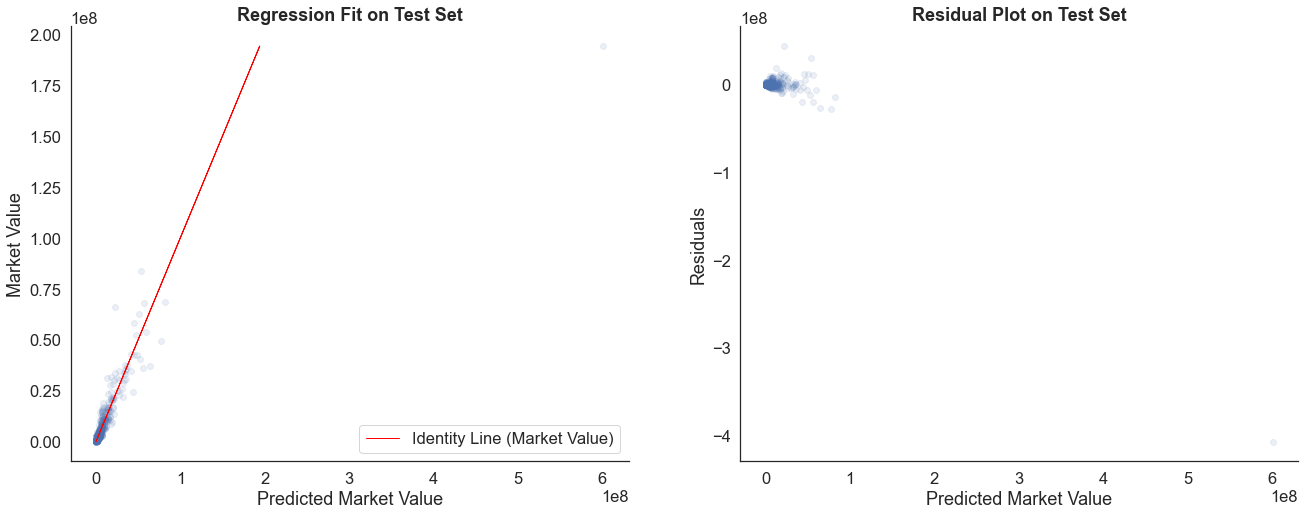

In [108]:
sns.set(style='white',font_scale=1.5)
diagnostic_plot3(X_train_val, y_train_val,X_test,y_test)
plt.savefig('regression2.png',transparent=True, bbox_inches='tight')

In [109]:
Test_Set.dtypes

short_name                   object
Market Value                float64
Predicted Market Value      float64
age                           int64
international_reputation      int64
defending                   float64
passing                     float64
physic                      float64
shooting                    float64
goalkeeping                 float64
dtype: object

In [110]:
Test_Set['Predicted Market Value'] 

0       2.188579e+08
1       7.259231e+07
2       6.856135e+07
3       5.571657e+07
4       4.950033e+07
            ...     
1919    5.947467e+04
1920    5.748527e+04
1921    4.402832e+04
1922    4.179076e+04
1923    3.297115e+04
Name: Predicted Market Value, Length: 1924, dtype: float64

In [111]:
Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))

C:\Users\Kiko\AppData\Local\Temp/ipykernel_9988/3522353445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
C:\Users\Kiko\AppData\Local\Temp/ipykernel_9988/3522353445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))


In [112]:
Test_Set

short_name Market Value Predicted Market Value  age  \
0         K. Mbappé  194,000,000            218,857,904   22   
1      T. Hernández   62,499,999             72,592,309   23   
2      G. Wijnaldum   40,499,999             68,561,346   30   
3      A. Robertson   83,499,999             55,716,569   27   
4          M. Acuña   37,000,000             49,500,327   29   
...             ...          ...                    ...  ...   
1919       T. Uskok      200,000                 59,474   30   
1920  P. Huntington      400,000                 57,485   33   
1921      A. Nastos      130,000                 44,028   32   
1922   Kim Yeon Soo      139,999                 41,790   27   
1923  Cho Suk Young      100,000                 32,971   24   

      international_reputation  defending  passing  physic  shooting  \
0                            4        3.6      8.0     7.7       8.8   
1                            3        7.7      7.6     8.2       7.1   
2                            3        7.9      8.0     7.9       7.5   
3                            3        8.2      8.1     7.6       6.1   
4                            2        7.9      8.2     8.2       7.4   
...                        ...        ...      ...     ...       ...   
1919                         1        6.1      3.7     6.6       2.4   
1920                         1        6.7      3.8     7.0       3.2   
1921                         1        5.7      3.9     6.7       3.1   
1922                         1        5.8      2.9     6.2       2.3   
1923                         1        5.1      3.0     6.1       2.4   

      goalkeeping  
0        1.300000  
1        1.316667  
2        1.500000  
3        1.433333  
4        1.633333  
...           ...  
1919     1.450000  
1920     1.300000  
1921     1.300000  
1922     1.533333  
1923     1.233333  

[1924 rows x 10 columns]

In [113]:
#Test_Set['Market Value'] = Test_Set['Market Value'].apply(lambda x : "{:,}".format(int(x)))
#Test_Set['Predicted Market Value'] = Test_Set['Predicted Market Value'].apply(lambda x : "{:,}".format(int(x)))
Test_Set[['international_reputation','defending','passing','physic','shooting','goalkeeping']] = Test_Set[['international_reputation','defending','passing','physic','shooting','goalkeeping']].apply(lambda x: round(x,1))
Test_Set = Test_Set.rename(columns={'Market Value':'Market Value (Euros)','Predicted Market Value': 'Predicted Market Value (Euros)'})
Test_Set

C:\Users\Kiko\AppData\Local\Temp/ipykernel_9988/3336555700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test_Set[['international_reputation','defending','passing','physic','shooting','goalkeeping']] = Test_Set[['international_reputation','defending','passing','physic','shooting','goalkeeping']].apply(lambda x: round(x,1))


short_name Market Value (Euros) Predicted Market Value (Euros)  age  \
0         K. Mbappé          194,000,000                    218,857,904   22   
1      T. Hernández           62,499,999                     72,592,309   23   
2      G. Wijnaldum           40,499,999                     68,561,346   30   
3      A. Robertson           83,499,999                     55,716,569   27   
4          M. Acuña           37,000,000                     49,500,327   29   
...             ...                  ...                            ...  ...   
1919       T. Uskok              200,000                         59,474   30   
1920  P. Huntington              400,000                         57,485   33   
1921      A. Nastos              130,000                         44,028   32   
1922   Kim Yeon Soo              139,999                         41,790   27   
1923  Cho Suk Young              100,000                         32,971   24   

      international_reputation  defending  passing  physic  shooting  \
0                            4        3.6      8.0     7.7       8.8   
1                            3        7.7      7.6     8.2       7.1   
2                            3        7.9      8.0     7.9       7.5   
3                            3        8.2      8.1     7.6       6.1   
4                            2        7.9      8.2     8.2       7.4   
...                        ...        ...      ...     ...       ...   
1919                         1        6.1      3.7     6.6       2.4   
1920                         1        6.7      3.8     7.0       3.2   
1921                         1        5.7      3.9     6.7       3.1   
1922                         1        5.8      2.9     6.2       2.3   
1923                         1        5.1      3.0     6.1       2.4   

      goalkeeping  
0             1.3  
1             1.3  
2             1.5  
3             1.4  
4             1.6  
...           ...  
1919          1.4  
1920          1.3  
1921          1.3  
1922          1.5  
1923          1.2  

[1924 rows x 10 columns]

In [114]:
Test_Set.to_csv('prueba final.csv')

# Linear Regression

In [ ]:
lin_reg = LinearRegression()

In [ ]:
lin_reg.fit(fifa_dataset_features_x_train, fifa_dataset_labels_y_train)

In [ ]:
fifa_dataset_labels_y_train.head()

In [ ]:
fifa_dataset_predictions_x_train = lin_reg.predict(fifa_dataset_features_x_train)
lin_mse = mean_squared_error(fifa_dataset_labels_y_train, fifa_dataset_predictions_x_train)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
fifa_dataset_predictions_x_test = lin_reg.predict(fifa_dataset_features_x_test)
lin_mse = mean_squared_error(fifa_dataset_labels_y_test, fifa_dataset_predictions_x_test)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

In [ ]:
score = r2_score(fifa_dataset_labels_y_train, fifa_dataset_predictions_x_train)  
print('Accuracy:',format(score*100,'.2f'),'%')

In [ ]:
score = r2_score(fifa_dataset_labels_y_test, fifa_dataset_predictions_x_test)  
print('Accuracy:',format(score*100,'.2f'),'%')

In [ ]:
# Plot result for testing
plt.plot(list(fifa_dataset_predictions_x_test), linestyle='--', label='Pred Next Year Market Value')
plt.plot(list(fifa_dataset_labels_y_test), label='Actual Next Year Market Value')
plt.xlabel('Steps into the test set')
plt.ylabel('Next Year Market Value')
plt.legend(loc='upper right');
plt.show()

# Plot result for training dataset
plt.plot(list(fifa_dataset_predictions_x_train), linestyle='--', label='Pred Next Year Market Value')
plt.plot(list(fifa_dataset_labels_y_train), label='Actual Next Year Market Value')
plt.xlabel('Steps into the train set')
plt.ylabel('Next Year Market Value')
plt.legend(loc='upper right');
plt.show()

In [ ]:
#Calculate regression Quality metrics
def calculate_regression_quality_metrics(y_test, y_test_pred, y_train, y_train_pred):

    #Calculate the metrics for the test data
    R2 = sklearn.metrics.r2_score(y_test, y_test_pred)
    MAE = sklearn.metrics.mean_absolute_error(y_test, y_test_pred)
    RMSE = np.sqrt(sklearn.metrics.mean_absolute_error(y_test, y_test_pred))
    print ("R2_test: {0:.3f}".format(R2))
    print ("MAE_test: {0:.2f}".format(MAE))
    print ("RMSE_test: {0:.2f}".format(RMSE))
    
    #Calculate the metrics for the train data
    R2_t = sklearn.metrics.r2_score(y_train, y_train_pred)
    MAE_t = sklearn.metrics.mean_absolute_error(y_train,y_train_pred)
    RMSE_t = np.sqrt(sklearn.metrics.mean_absolute_error(y_train, y_train_pred))
    print ("R2_train: {0:.3f}".format(R2_t))
    print ("MAE_train: {0:.2f}".format(MAE_t))
    print ("RMSE_train: {0:.2f}".format(RMSE_t))
    print (" ")



In [ ]:
calculate_regression_quality_metrics(fifa_dataset_labels_y_test, fifa_dataset_predictions_x_test, fifa_dataset_labels_y_train, fifa_dataset_predictions_x_train)

# Decision Trees

In [ ]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(fifa_dataset_features_x_train, fifa_dataset_labels_y_train)

In [ ]:
fifa_dataset_predictions_x_train_decision_tree = tree_reg.predict(fifa_dataset_features_x_train)
tree_mse = mean_squared_error( fifa_dataset_labels_y_train, fifa_dataset_predictions_x_train_decision_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(tree_rmse))

In [ ]:
score = r2_score(fifa_dataset_labels_y_train, fifa_dataset_predictions_x_train_decision_tree)  
print('Accuracy:',format(score*100,'.2f'),'%')

In [ ]:
def get_mae(max_leaf_nodes, fifa_dataset_features_x_train, fifa_dataset_features_x_test, fifa_dataset_labels_y_train, fifa_dataset_labels_y_test):
    """Return the mae of the random forest."""
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=1)
    model.fit(fifa_dataset_features_x_train, fifa_dataset_labels_y_train)
    preds_test = model.predict(fifa_dataset_features_x_test)
    mae = mean_absolute_error(fifa_dataset_labels_y_test, preds_test)
    return(mae)

candidate_max_leaf_nodes = range(20, 30)

best_mae =  get_mae(5, fifa_dataset_features_x_train, fifa_dataset_features_x_test, fifa_dataset_labels_y_train, fifa_dataset_labels_y_test)
for max_leaf_nodes in candidate_max_leaf_nodes[1:]:
    candidate_mae = get_mae(max_leaf_nodes, fifa_dataset_features_x_train, fifa_dataset_features_x_test, fifa_dataset_labels_y_train, fifa_dataset_labels_y_test)
    if candidate_mae < best_mae:
        best_mae, best_candidate = candidate_mae, max_leaf_nodes

best_tree_size = best_candidate
print(f"Best tree size is {best_tree_size} nodes.")

I consider this algorithm is overfitted, then I decided to use DecisionTreeRegressor

In [ ]:
price_model_tree_max = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=42)
price_model_tree_max.fit(fifa_dataset_features_x_train, fifa_dataset_labels_y_train)

test_predictions = price_model_tree_max.predict(fifa_dataset_features_x_test)
test_mae = mean_absolute_error(test_predictions, fifa_dataset_labels_y_test)
test_mae
print("Validation MAE when max_leaf_nodes={}: {:,.0f}".format(best_tree_size, test_mae))

In [ ]:
score = r2_score(fifa_dataset_labels_y_test, test_predictions)  
print('Accuracy:',format(score*100,'.2f'),'%')

In [ ]:
fn=fifa_dataset_features_x_train.columns
cn=fifa_dataset_labels_y_test.name
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,6), dpi=600)
sktree.plot_tree(price_model_tree_max,
                 filled = True)
axes.set_title('Decision Tree with maximum size', fontsize = 14)
fig.savefig('tree_nomax.png')

# Random Forest

In [ ]:
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(fifa_dataset_features_x_train, fifa_dataset_labels_y_train)

In [ ]:
fifa_dataset_predictions_random_forest = forest_reg.predict(fifa_dataset_features_x_test)
forest_mse = mean_squared_error(fifa_dataset_labels_y_test, fifa_dataset_predictions_random_forest)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

In [ ]:
# Use  the train model to preidct the y-values for the records in the valdiation dataset
fifa_dataset_predictions_random_forest_y_test_pred = forest_reg.predict(fifa_dataset_features_x_test)
fifa_dataset_predictions_random_forest_y_train_pred = forest_reg.predict(fifa_dataset_features_x_train)

In [ ]:
score = r2_score(fifa_dataset_labels_y_test, fifa_dataset_predictions_random_forest_y_test_pred)  
print('Accuracy:',format(score*100,'.2f'),'%')

In [ ]:
calculate_regression_quality_metrics(fifa_dataset_labels_y_test, fifa_dataset_predictions_random_forest_y_test_pred, fifa_dataset_labels_y_train, fifa_dataset_predictions_random_forest_y_train_pred)

In [ ]:
fn=fifa_dataset_features_x_train.columns
cn=fifa_dataset_labels_y_test.name
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(11,3), dpi=300)
for index in range(0, 5):
    sktree.plot_tree(forest_reg.estimators_[index],
                     #feature_names = fn,
                     filled = True,
                     ax = axes[index])
    axes[index].set_title('Estimator: ' + str(index+1), fontsize = 11)
fig.savefig('forest_5trees.png')

# Predict the Export value for the next year using Ramdon Forest

In [ ]:
x_forecast = fifa_dataset

In [ ]:
x_forecast = x_forecast.drop(columns = ['value_eur'])

In [ ]:
prediction = forest_reg.predict(x_forecast)

#we need to take into account that the target column had been normalize so after we get the predicion result we have to rever the normalization
#revert the normalization to look at the real data
prediction = np.expm1(prediction)

print("The Expected market Value for 2022 is  {} ".format(prediction))

# Evaluation using Cross-Validation

In [ ]:
scores = cross_val_score(tree_reg, fifa_dataset_features_x_train, fifa_dataset_labels_y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

In [ ]:
lin_scores = cross_val_score(lin_reg, fifa_dataset_features_x_train, fifa_dataset_labels_y_train, 
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

In [ ]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             fifa_dataset_features_x_train,
                             fifa_dataset_labels_y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [ ]:
get_cv_scores(lin_reg)

# Fine-Tune the Model

# Grid Search

In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(fifa_dataset_features_x_train, fifa_dataset_labels_y_train)

In [ ]:
forest_reg

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_estimator_

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

# Evaluate the model on the Test Set

In [ ]:
test_set = test_set.replace(0, pd.np.nan)
tf_test = imputer.transform(test_set)
fifa_dataset_tf_test = pd.DataFrame(tf_test, columns=fifa_dataset.columns)

In [ ]:
fifa_dataset_features_x_test = fifa_dataset_tf_test.drop("value_eur", axis=1)
fifa_dataset_labels_y_test = fifa_dataset_tf_test["value_eur"].copy()

In [ ]:
final_model = grid_search.best_estimator_

final_predictions = final_model.predict(fifa_dataset_features_x_test)

final_mse = mean_squared_error(fifa_dataset_labels_y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

In [ ]:
final_predictions

In [ ]:
final_model_score = r2_score(fifa_dataset_labels_y_test, final_predictions)  
print('Accuracy:',format(final_model_score*100,'.2f'),'%')

In [ ]:
players_index = players_22.loc[players_22.short_name.isin(["L. Messi"])].index
players_22.iloc[players_index]

In [ ]:
fifa_dataset_labels_y_train.loc[players_22['sofifa_id'] == 158023]

In [ ]:
predictions = forest_reg.predict(test_set.loc[players_22['sofifa_id'] == 158023])
for i in range(len(players_index)):
    predicted_value = round(predictions[i], 0)
    real_value = raw_transfers19.iloc[players_index[i]].value
    print("----------------------------------------")
    print("Predictions for", raw_transfers19.iloc[players_index[i]].player)
    print("Predicted value :", str(predicted_value)[:-2], "€")
    print("Real value :     ", real_value,  "€")
    print("Difference :     ", predicted_value - real_value)
    print("Error rate :     ", round(100*abs(predicted_value - real_value)/real_value, 1), "%")